<a href="https://colab.research.google.com/github/msbbk110/excel-to-python-data-science-intro-000/blob/master/Amit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Capstone Project - Using NLP to predict earning revisions based on earnings transcripts** 

***Project description***

1. Examine XX companies earnings conference transcripts over the past 12-18 months with negative and postive earnings revisions

2. Goal is to identify if companies provide insight during their conference calls that anticipate negative/positive earnings revisions in the coming quarters. 

3. Use various feature engineering, sentiment analysis & modeling techniques to predict probability of companies meeting/beating expectations in the future

## **Section 1 - Import libraries, web-scrapping, data collection** 




In [0]:
pip install git+https://github.com/hanzhichao2000/pysentiment

  Cloning https://github.com/hanzhichao2000/pysentiment to /tmp/pip-req-build-45e862dn
  Running command git clone -q https://github.com/hanzhichao2000/pysentiment /tmp/pip-req-build-45e862dn
  Created wheel for pysentiment: filename=pysentiment-0.2-cp36-none-any.whl size=3136729 sha256=c00dc820d73c98eacf9b05fa6a96980c849d4c075e009e34c3a34142dddecec3
  Stored in directory: /tmp/pip-ephem-wheel-cache-nh942whk/wheels/d4/5a/f5/efb2f40e8258a870cfb267476acdb4bfd4fba69f987559f780
Successfully built pysentiment


In [0]:
pip install textstat readability pandas textatistic textblob #pysentiment   #pysentiment==0.1 

In [0]:
#Libraries
import pandas as pd
import requests 
import numpy as np
import wordcloud
import seaborn as sns
from matplotlib import cm
import statsmodels.api as sm
from time import sleep
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from textstat.textstat import textstat
import nltk
from nltk.corpus import stopwords, re
import readability
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,ENGLISH_STOP_WORDS 
from sklearn.feature_extraction import stop_words
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import statsmodels.stats.weightstats as sms
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
import pysentiment as ps
from textblob import TextBlob


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Web-scrapping, import text for analysis**

##Profit-warning/negative earning revisions companies




In [0]:
# path = '/Users/amarwaha/dsi-10/atx-flex-10-v1/Capstone/Data-transcripts/'
# Companies with negative earnings revisions 
# TICKERS = AN, CHK, CVX,FLR, GE, M, APA, OXY, TLRY, XEC

####1. AN - Sector= Oil & gas###### 
res_an_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/02/13/antero-resources-corporation-ar-q4-2019-earnings-c.aspx') 
print("200 = ok, 400 = check connection: AN-Q419",res_an_Q419.status_code)

res_an_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/30/antero-resources-corporation-ar-q3-2019-earnings-c.aspx') 
print("200 = ok, 400 = check connection: AN-Q319",res_an_Q319.status_code)

res_an_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/05/antero-resources-corporation-ar-q2-2019-earnings-c.aspx') 
print("200 = ok, 400 = check connection: AN-Q219",res_an_Q219.status_code)

res_an_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/03/antero-resources-corporation-ar-q1-2019-earnings-c.aspx') 
print("200 = ok, 400 = check connection: AN-Q119",res_an_Q119.status_code)


###2. CHK - Sector= Oil & gas##### 
res_chk_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/05/chesapeake-energy-corp-chk-q3-2019-earnings-call-t.aspx') 
print("200 = ok, 400 = check connection: CHK-Q319",res_chk_Q319.status_code)

res_chk_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/06/chesapeake-energy-corp-chk-q2-2019-earnings-call-t.aspx') 
print("200 = ok, 400 = check connection: CHK-Q219",res_chk_Q219.status_code)

res_chk_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/08/chesapeake-energy-corp-chk-q1-2019-earnings-call-t.aspx') 
print("200 = ok, 400 = check connection: CHK-Q119",res_chk_Q119.status_code)

res_chk_Q418 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/02/27/chesapeake-energy-corporation-chk-q4-2018-earnings.aspx') 
print("200 = ok, 400 = check connection: CHK-Q418",res_chk_Q418.status_code)


###3. CVX - Sector= Oil & gas####
res_cvx_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/01/31/chevron-corporation-cvx-q4-2019-earnings-call-tran.aspx') 
print("200 = ok, 400 = check connection: CVX-Q419",res_cvx_Q419.status_code)

res_cvx_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/01/chevron-corporation-cvx-q3-2019-earnings-call-tran.aspx') 
print("200 = ok, 400 = check connection: CVX-Q319",res_cvx_Q319.status_code)

res_cvx_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/02/chevron-corporation-cvx-q2-2019-earnings-call-tran.aspx') 
print("200 = ok, 400 = check connection: CVX-Q219",res_cvx_Q219.status_code)

res_cvx_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/04/26/chevron-corporation-cvx-q1-2019-earnings-call-tran.aspx') 
print("200 = ok, 400 = check connection: CVX-Q119",res_cvx_Q119.status_code)


##4. FLR - Sector= Industrial####
res_flr_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/02/18/fluor-corp-flr-q4-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: FLR-Q419",res_flr_Q419.status_code)

res_flr_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/31/fluor-corp-flr-q3-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: FLR-Q419",res_flr_Q319.status_code)

res_flr_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/02/fluor-corp-flr-q2-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: FLR-Q219",res_flr_Q219.status_code)

res_flr_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/02/fluor-corp-flr-q1-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: FLR-Q219",res_flr_Q119.status_code)



##5. GE - Sector= Industrial###
res_ge_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/01/29/general-electric-company-ge-q4-2019-earnings-call.aspx') 
print("200 = ok, 400 = check connection: GE-Q419",res_flr_Q419.status_code)

res_ge_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/30/general-electric-company-ge-q3-2019-earnings-call.aspx') 
print("200 = ok, 400 = check connection: GE-Q319",res_flr_Q319.status_code)

res_ge_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/30/general-electric-company-ge-q3-2019-earnings-call.aspx') 
print("200 = ok, 400 = check connection: GE-Q219",res_flr_Q219.status_code)

res_ge_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/04/30/general-electric-co-ge-q1-2019-earnings-call-trans.aspx') 
print("200 = ok, 400 = check connection: GE-Q119",res_flr_Q119.status_code)


##6. M - Sector= Consumer discretionary####
res_M_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/21/macys-inc-m-q3-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: M-Q319",res_M_Q319.status_code)

res_M_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/14/macys-inc-m-q2-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: M-Q219",res_M_Q219.status_code)

res_M_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/15/macys-inc-m-q1-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: M-Q119",res_M_Q119.status_code)

res_M_Q418 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/02/26/macys-inc-m-q4-2018-earnings-conference-call-trans.aspx') 
print("200 = ok, 400 = check connection: M-Q418",res_M_Q418.status_code)


##7. MRO - Sector= Oil & gas####
res_apa_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/01/apache-apa-q3-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: APA-Q319",res_apa_Q319.status_code)

res_apa_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/02/apache-apa-q2-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: APA-Q219",res_apa_Q219.status_code)

res_apa_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/02/apache-apa-q1-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: APA-Q119",res_apa_Q119.status_code)

res_apa_Q418 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/03/01/apache-apa-q4-2018-earnings-conference-call-transc.aspx') 
print("200 = ok, 400 = check connection: APA-Q419",res_apa_Q418.status_code)


##8. OXY - Sector= Oil & gas####
res_oxy_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/05/occidental-petroleum-corp-oxy-q3-2019-earnings-cal.aspx') 
print("200 = ok, 400 = check connection: OXY-Q319",res_oxy_Q319.status_code)

res_oxy_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/01/occidental-petroleum-corp-oxy-q2-2019-earnings-cal.aspx') 
print("200 = ok, 400 = check connection: OXY-Q219",res_oxy_Q219.status_code)

res_oxy_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/07/occidental-petroleum-corp-oxy-q1-2019-earnings-cal.aspx') 
print("200 = ok, 400 = check connection: OXY-Q119",res_oxy_Q119.status_code)

res_oxy_Q418 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/02/13/occidental-petroleum-corp-oxy-q4-2018-earnings-con.aspx') 
print("200 = ok, 400 = check connection: OXY-Q418",res_oxy_Q418.status_code)


###9. TLRY - Sector= Consumer discretionary######
res_tlry_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/13/tilray-inc-tlry-q3-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: TLRY-Q319",res_tlry_Q319.status_code)

res_tlry_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/14/tilray-inc-tlry-q2-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: TLRY-Q219",res_tlry_Q219.status_code)

res_tlry_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/15/tilray-inc-tlry-q1-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: TLRY-Q119",res_tlry_Q119.status_code)

res_tlry_Q418 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/03/19/tilray-inc-tlry-q4-2018-earnings-conference-call-t.aspx') 
print("200 = ok, 400 = check connection: TLRY-Q418",res_tlry_Q418.status_code)


##10. XEC - Sector= Oil & gas####
res_xec_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/02/20/cimarex-energy-co-xec-q4-2019-earnings-call-transc.aspx') 
print("200 = ok, 400 = check connection: XEC-Q419",res_xec_Q419.status_code)

res_xec_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/05/cimarex-energy-co-xec-q3-2019-earnings-call-transc.aspx') 
print("200 = ok, 400 = check connection: XEC-Q319",res_xec_Q319.status_code)

res_xec_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/06/cimarex-energy-co-xec-q2-2019-earnings-call-transc.aspx') 
print("200 = ok, 400 = check connection: XEC-Q119",res_xec_Q219.status_code)

res_xec_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/09/cimarex-energy-co-xec-q1-2019-earnings-call-transc.aspx') 
print("200 = ok, 400 = check connection: XEC-Q119",res_xec_Q119.status_code)



200 = ok, 400 = check connection: AN-Q419 200
200 = ok, 400 = check connection: AN-Q319 200
200 = ok, 400 = check connection: AN-Q219 200
200 = ok, 400 = check connection: AN-Q119 200
200 = ok, 400 = check connection: CHK-Q319 200
200 = ok, 400 = check connection: CHK-Q219 200
200 = ok, 400 = check connection: CHK-Q119 200
200 = ok, 400 = check connection: CHK-Q418 200
200 = ok, 400 = check connection: CVX-Q419 200
200 = ok, 400 = check connection: CVX-Q319 200
200 = ok, 400 = check connection: CVX-Q219 200
200 = ok, 400 = check connection: CVX-Q119 200
200 = ok, 400 = check connection: FLR-Q419 200
200 = ok, 400 = check connection: FLR-Q419 200
200 = ok, 400 = check connection: FLR-Q219 200
200 = ok, 400 = check connection: FLR-Q219 200
200 = ok, 400 = check connection: GE-Q419 200
200 = ok, 400 = check connection: GE-Q319 200
200 = ok, 400 = check connection: GE-Q219 200
200 = ok, 400 = check connection: GE-Q119 200
200 = ok, 400 = check connection: M-Q319 200
200 = ok, 400 = check c

##Positive surprises/neutral earnings revisions group of companies

In [0]:
# path = '/Users/amarwaha/dsi-10/atx-flex-10-v1/Capstone/Data-transcripts/'

# TICKERS = AMZN, BAH, CMG, MSFT, HASI,NEM, SRE, PXD,JPM, LULU

####1. AMZN - Sector= Consumer Discretionary###### 
res_AMZN_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/01/31/amazoncom-inc-amzn-q4-2018-earnings-conference-cal.aspx') 
print("200 = ok, 400 = check connection: AMZN-Q419",res_AMZN_Q419.status_code)

res_AMZN_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/24/amazoncom-inc-amzn-q3-2019-earnings-call-transcrip.aspx') 
print("200 = ok, 400 = check connection: AMZN-Q319",res_AMZN_Q319.status_code)

res_AMZN_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/07/26/amazoncom-inc-amzn-q2-2019-earnings-call-transcrip.aspx') 
print("200 = ok, 400 = check connection: AMZN-Q219",res_AMZN_Q219.status_code)

res_AMZN_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/04/25/amazoncom-inc-amzn-q1-2019-earnings-call-transcrip.aspx') 
print("200 = ok, 400 = check connection: AMZN-Q119",res_AMZN_Q119.status_code)


####2. BAH- Sector= Defense/Industrial###### 
res_BAH_Q320 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/01/31/booz-allen-hamilton-holding-corp-bah-q3-2020-earni.aspx') 
print("200 = ok, 400 = check connection: BAHQ320",res_BAH_Q320.status_code)

res_BAH_Q220 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/01/booz-allen-hamilton-holding-corp-bah-q2-2020-earni.aspx') 
print("200 = ok, 400 = check connection: BAHQ220",res_BAH_Q220.status_code)

res_BAH_Q120 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/07/29/booz-allen-hamilton-holding-corp-bah-q1-2020-earni.aspx') 
print("200 = ok, 400 = check connection: BAHQ120",res_BAH_Q120.status_code)

res_BAH_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/28/booz-allen-hamilton-holding-corp-bah-q4-2019-earni.aspx') 
print("200 = ok, 400 = check connection: BAHQ419",res_BAH_Q419.status_code)


####3. CMG- Sector= Consumer discretionary###### 
res_CMG_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/02/05/chipotle-mexican-grill-inc-cmg-q4-2019-earnings-ca.aspx') 
print("200 = ok, 400 = check connection: CMG-Q419",res_CMG_Q419.status_code)

res_CMG_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/22/chipotle-mexican-grill-inc-cmg-q3-2019-earnings-ca.aspx') 
print("200 = ok, 400 = check connection: CMG-Q319",res_CMG_Q319.status_code)

res_CMG_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/07/23/chipotle-mexican-grill-inc-cmg-q2-2019-earnings-ca.aspx') 
print("200 = ok, 400 = check connection: CMG-Q219",res_CMG_Q219.status_code)

res_CMG_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/04/24/chipotle-mexican-grill-inc-cmg-q1-2019-earnings-ca.aspx') 
print("200 = ok, 400 = check connection: CMG-Q119",res_CMG_Q119.status_code)


####4. HASI - Sector= REITS###### 
res_HASI_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/02/21/hannon-armstrong-sustainable-infrastructure-capita.aspx') 
print("200 = ok, 400 = check connection: HASI-Q419",res_HASI_Q419.status_code)

res_HASI_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/31/hannon-armstrong-sustainable-infrastructure-capita.aspx') 
print("200 = ok, 400 = check connection: HASI-Q319",res_HASI_Q319.status_code)

res_HASI_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/02/hannon-armstrong-sustainable-infrastructure-capita.aspx') 
print("200 = ok, 400 = check connection: HASI-Q219",res_HASI_Q219.status_code)

res_HASI_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/02/hannon-armstrong-sustainable-infrastructure-capita.aspx') 
print("200 = ok, 400 = check connection: HASI-Q119",res_HASI_Q119.status_code)


####5. MSFT- Sector= Info Tech###### 
res_MSFT_Q220 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/01/30/microsoft-corp-msft-q2-2020-earnings-call-transcri.aspx') 
print("200 = ok, 400 = check connection: MSFT-Q220",res_MSFT_Q220.status_code)

res_MSFT_Q120 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/23/microsoft-corp-msft-q1-2020-earnings-call-transcri.aspx') 
print("200 = ok, 400 = check connection: MSFT-Q120",res_MSFT_Q120.status_code)

res_MSFT_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/07/18/microsoft-corp-msft-q4-2019-earnings-call-transcri.aspx') 
print("200 = ok, 400 = check connection: MSFT-Q419",res_MSFT_Q419.status_code)

res_MSFT_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/04/25/microsoft-corp-msft-q3-2019-earnings-call-transcri.aspx') 
print("200 = ok, 400 = check connection: MSFT-Q319",res_MSFT_Q319.status_code)


####6. NEM- Sector= Materials###### 
res_NEM_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/02/21/newmont-goldcorp-nem-q4-2019-earnings-call-transcr.aspx') 
print("200 = ok, 400 = check connection: NEM-Q419",res_NEM_Q419.status_code)

res_NEM_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/06/newmont-goldcorp-nem-q3-2019-earnings-call-transcr.aspx') 
print("200 = ok, 400 = check connection: NEM-Q319",res_NEM_Q319.status_code)

res_NEM_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/07/26/newmont-goldcorp-nem-q2-2019-earnings-call-transcr.aspx') 
print("200 = ok, 400 = check connection: NEM-Q219",res_NEM_Q219.status_code)

res_NEM_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/04/26/newmont-mining-nem-q1-2019-earnings-call-transcrip.aspx') 
print("200 = ok, 400 = check connection: NEM-Q119",res_NEM_Q119.status_code)


####7. SRE- Sector= Utilities###### 
res_SRE_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/01/sempra-energy-sre-q3-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: SRE-Q319",res_SRE_Q319.status_code)

res_SRE_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/02/sempra-energy-sre-q2-2019-earnings-call-transcript.aspx') 
print("200 = ok, 400 = check connection: SRE-Q219",res_SRE_Q219.status_code)

res_SRE_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2018/05/07/sempra-energy-sre-q1-2018-earnings-conference-call.aspx') 
print("200 = ok, 400 = check connection: SRE-Q19",res_SRE_Q119.status_code)

res_SRE_Q418 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/02/26/sempra-energy-sre-q4-2018-earnings-conference-call.aspx') 
print("200 = ok, 400 = check connection: SRE-Q418",res_SRE_Q418.status_code)



####8. PXD- Sector= Oil & gas###### 
res_PXD_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/02/21/pioneer-natural-resources-pxd-q4-2019-earnings-cal.aspx') 
print("200 = ok, 400 = check connection: PXD-Q419",res_PXD_Q419.status_code)

res_PXD_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/11/05/pioneer-natural-resources-pxd-q3-2019-earnings-cal.aspx') 
print("200 = ok, 400 = check connection: PXD-Q319",res_PXD_Q319.status_code)

res_PXD_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/08/07/pioneer-natural-resources-pxd-q2-2019-earnings-cal.aspx') 
print("200 = ok, 400 = check connection: PXD-Q29",res_PXD_Q219.status_code)

res_PXD_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/05/07/pioneer-natural-resources-pxd-q1-2019-earnings-cal.aspx') 
print("200 = ok, 400 = check connection: PXD-Q418",res_PXD_Q119.status_code)


####9. JPM- Sector= Financials###### 
res_JPM_Q419 = requests.get('https://www.fool.com/earnings/call-transcripts/2020/01/14/jpmorgan-chase-co-jpm-q4-2019-earnings-call-transc.aspx') 
print("200 = ok, 400 = check connection: JPM-Q419",res_JPM_Q419.status_code)

res_JPM_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/10/16/jpmorgan-chase-jpm-q3-2019-earnings-call-transcrip.aspx') 
print("200 = ok, 400 = check connection: JPM-Q319",res_JPM_Q319.status_code)

res_JPM_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/07/16/jpmorgan-chase-jpm-q2-2019-earnings-call-transcrip.aspx') 
print("200 = ok, 400 = check connection: JPM-Q29",res_JPM_Q219.status_code)

res_JPM_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/04/12/jpmorgan-chase-co-jpm-q1-2019-earnings-call-transc.aspx') 
print("200 = ok, 400 = check connection: JPM-Q418",res_JPM_Q119.status_code)


####10. LULU- Sector= Consumer Discretionary###### 
res_LULU_Q319 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/12/11/lululemon-athletica-inc-lulu-q3-2019-earnings-call.aspx') 
print("200 = ok, 400 = check connection: LULU-Q319",res_LULU_Q319.status_code)

res_LULU_Q219 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/09/05/lululemon-athletica-inc-lulu-q2-2019-earnings-call.aspx') 
print("200 = ok, 400 = check connection: LULU-Q219",res_LULU_Q219.status_code)

res_LULU_Q119 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/06/12/lululemon-athletica-inc-lulu-q1-2019-earnings-call.aspx') 
print("200 = ok, 400 = check connection: LULU-Q19",res_LULU_Q119.status_code)

res_LULU_Q418 = requests.get('https://www.fool.com/earnings/call-transcripts/2019/03/28/lululemon-athletica-lulu-q4-2018-earnings-conferen.aspx') 
print("200 = ok, 400 = check connection: LULU-Q418",res_LULU_Q418.status_code)

200 = ok, 400 = check connection: AMZN-Q419 200
200 = ok, 400 = check connection: AMZN-Q319 200
200 = ok, 400 = check connection: AMZN-Q219 200
200 = ok, 400 = check connection: AMZN-Q119 200
200 = ok, 400 = check connection: BAHQ320 200
200 = ok, 400 = check connection: BAHQ220 200
200 = ok, 400 = check connection: BAHQ120 200
200 = ok, 400 = check connection: BAHQ419 200
200 = ok, 400 = check connection: CMG-Q419 200
200 = ok, 400 = check connection: CMG-Q319 200
200 = ok, 400 = check connection: CMG-Q219 200
200 = ok, 400 = check connection: CMG-Q119 200
200 = ok, 400 = check connection: HASI-Q419 200
200 = ok, 400 = check connection: HASI-Q319 200
200 = ok, 400 = check connection: HASI-Q219 200
200 = ok, 400 = check connection: HASI-Q119 200
200 = ok, 400 = check connection: MSFT-Q220 200
200 = ok, 400 = check connection: MSFT-Q120 200
200 = ok, 400 = check connection: MSFT-Q419 200
200 = ok, 400 = check connection: MSFT-Q319 200
200 = ok, 400 = check connection: NEM-Q419 200
200 =

**Store list of earnings calls**

In [0]:
## Negative revisions/profit warnings - list of lists, store historic earnings 
an_list = [res_an_Q419, res_an_Q319, res_an_Q219, res_an_Q119]
chk_list = [res_chk_Q319,res_chk_Q219,res_chk_Q119,res_chk_Q418] 
cvx_list = [res_cvx_Q419, res_cvx_Q319, res_cvx_Q219, res_cvx_Q119]
flr_list = [res_flr_Q419, res_flr_Q319, res_flr_Q219, res_flr_Q119]
ge_list = [res_ge_Q419, res_ge_Q319,res_ge_Q219, res_ge_Q119 ]
m_list = [res_M_Q319, res_M_Q219, res_M_Q119, res_M_Q418]
apa_list = [res_apa_Q319,res_apa_Q219,res_apa_Q119, res_apa_Q418]
oxy_list = [res_oxy_Q319, res_oxy_Q219, res_oxy_Q119,res_oxy_Q418 ]
tlry_list = [res_tlry_Q319, res_tlry_Q219, res_tlry_Q119, res_tlry_Q418]
xec_list = [res_xec_Q419, res_xec_Q319, res_xec_Q219, res_xec_Q119] 

In [0]:
#Create single list to store all negative earnings transcripts
negative_cos_list = [an_list, chk_list,cvx_list, flr_list, ge_list, m_list,apa_list,oxy_list, tlry_list, xec_list]

In [0]:
##Create for loops to store web-scrapping data from earnings transcripts

negativecos = []        #create empty list of negative companies
co_prepremark_list = [] #create empty list for prepared remarks for negative companies
co_qa_list = []         #create empty list of Q&A for negative companies


#Loop through negative company list to break-out Prepared Remarks & Q&A for analysis below
for company in negative_cos_list:
  earnings_co_prepmark = []
  earning_qa_remarks = []

#Webscrapping Prepared Remarks on transcript call 
  for earnings in company:
    soup = BeautifulSoup(earnings.content)
    prepremarks = soup.find('h2', text="Prepared Remarks:")
    co_prepremark = ""

    #Extract prepared remarks
    for line in prepremarks.find_next_siblings():
      if line.find('div'):      #deal with google ads
          break
      else:
        co_prepremark += line.text
    earnings_co_prepmark.append(co_prepremark)
    co_prepremark_list.append(earnings_co_prepmark)

    #Extract questions and answer commentary
    # qa = soup.find('h2', text="Questions and Answers:")
    qa1 = soup.find('h2', text="Questions and Answers:")  #deal with google ads
    qa2 = soup.find('h2', text="Questions & Answers:")    #deal with google ads
    qa_remarks = ""

    #first for loop to collect Q&A commentary
    if(qa1):
      for line in qa1.find_next_siblings():
        if line.find('div'):                             #'google' in line.text: 
            break                                        #stop when reach google ad
        else:
          qa_remarks += line.text
      earning_qa_remarks.append(qa_remarks)
      co_qa_list.append(earning_qa_remarks)

    #secord for loop to collect Q&A commentary, helps to address if google adds in commentary to break corpus
    elif(qa2):
      for line in qa2.find_next_siblings():
        if line.find('div'):                            #'google' in line.text:    
            break                                       #stop when reach google ad
        else:
          qa_remarks += line.text
      earning_qa_remarks.append(qa_remarks)
      co_qa_list.append(earning_qa_remarks)
    else:
      empty_qa = ""
      earning_qa_remarks.append(empty_qa)
      co_qa_list.append(earning_qa_remarks)

In [0]:
#Test to see if webscrapping & lists built to form dataframes

print(f'number of companies with negative revisions=',len(negative_cos_list)) # 10 companies

all_earning = []
for i in negative_cos_list:
  for j in i:
    all_earning.append(j)

print()
print(f'companies with negative revisions =',len(all_earning))                                                  #40 earnings, total companies collected
print(f'number of companies earnings reports collected (4 quarters * # companies)=',len(co_prepremark_list))  #40 negative earnings reports/prepared remarks = 10 companies * 4 quarters
print(f'first company in list & number of quarters of prepared remarks =',len(co_prepremark_list[0]))         #4 prepared remarks in the first company
print()
# print(co_prepremark_list[0][1][:100]) # prepared remark of res_an_Q419, 

print(f'companies in negative revisions with QA =',len(co_qa_list))                                            #10 companies with Q&A collected 
print(f'number of companies earnings reports collected (4 quarters * # companies)=',len(co_qa_list[0]))        #4 question and answers sections collect for first company in corpus
print()
print(f'first company in list - sample of Q&A comments -----',co_qa_list[0][1][:100])                          #Q&A for res_an_Q419

#all_earning - gives response if website/conf call loaded
#co_prepremark_list - returns the full list of 40 prepared remarks conference calls 
#co_prepremark_list[x] - Prepared remarks, contains list of conf calls (4) for company in negative_cos_list, i.e. [0] is AN Q4-Q1 calls, Prep remarks

#co_qa_list - lists of company's Q&A 

#print(len(co_qa_list))
#co_qa_list[30]

number of companies with negative revisions= 10

companies with negative revisions = 40
number of companies earnings reports collected (4 quarters * # companies)= 40
first company in list & number of quarters of prepared remarks = 4

companies in negative revisions with QA = 40
number of companies earnings reports collected (4 quarters * # companies)= 4

first company in list - sample of Q&A comments ----- OperatorThank you. At this time, we'll be conducting the question-and-answer session. [Operator Inst


In [0]:
## Positive revisions/profit surprise - list of lists, stores historic earnings 
AMZN_list = [res_AMZN_Q419, res_AMZN_Q319, res_AMZN_Q219, res_AMZN_Q119]
BAH_list  = [res_BAH_Q320,res_BAH_Q220,res_BAH_Q120,res_BAH_Q419] 
CMG_list  = [res_CMG_Q419, res_CMG_Q319, res_CMG_Q219, res_CMG_Q119]
HASI_list = [res_HASI_Q419, res_HASI_Q319, res_HASI_Q219, res_HASI_Q119]
MSFT_list = [res_MSFT_Q220, res_MSFT_Q120,res_MSFT_Q419, res_MSFT_Q319]
NEM_list  = [res_NEM_Q419, res_NEM_Q319, res_NEM_Q219, res_NEM_Q119]
SRE_list  = [res_SRE_Q319,res_SRE_Q219,res_SRE_Q119, res_SRE_Q418]
PXD_list  = [res_PXD_Q419, res_PXD_Q319, res_PXD_Q219,res_PXD_Q119 ]
JPM_list  = [res_JPM_Q419, res_JPM_Q319, res_JPM_Q219, res_JPM_Q119]
LULU_list = [res_LULU_Q319, res_LULU_Q219, res_LULU_Q119, res_LULU_Q418] 

In [0]:
#Create a list of lists to store all positive earnings transcripts
POSITIVE_cos_list = [AMZN_list, BAH_list, CMG_list, HASI_list, MSFT_list, NEM_list, SRE_list, PXD_list, JPM_list, LULU_list]

In [0]:
positivecos = []            #create empty of positive/neutral companies
pos_co_prepremark_list = [] #create empty list for prepared remarks
pos_co_qa_list = []         #create empty list of Q&A
        
#Go through positive/neutral company list to break-out Prepared Remarks & Q&A for vectorizing & analysis below
for company in POSITIVE_cos_list:
  pos_earnings_co_prepmark = []
  pos_earning_qa_remarks = []


#Webscrapping Prepared Remarks on transcript call 
  for earnings in company:
    soup = BeautifulSoup(earnings.content)
    pos_prepremarks = soup.find('h2', text="Prepared Remarks:")
    pos_co_prepremark = ""

    #extract prepared remarks
    for line in pos_prepremarks.find_next_siblings():
       if line.find('div'):    #if 'google' in line.text:
          break
       else:
        pos_co_prepremark += line.text
    pos_earnings_co_prepmark.append(pos_co_prepremark)
    pos_co_prepremark_list.append(pos_earnings_co_prepmark)

    #extract questions and answers
    # pos_qa = soup.find('h2', text="Questions and Answers:")
    pos_qa1 = soup.find('h2', text="Questions and Answers:")
    pos_qa2 = soup.find('h2', text="Questions & Answers:")
    pos_qa_remarks = ""
    if(pos_qa1):
      for line in pos_qa1.find_next_siblings():
        if line.find('div'):                   # if 'google' in line.text:         
          continue                             # stop when reach google ad
        elif line.find('div'):                 # if 'google' in line.text:
          continue  
        else:
          pos_qa_remarks += line.text
      pos_earning_qa_remarks.append(pos_qa_remarks)
      pos_co_qa_list.append(pos_earning_qa_remarks)

    elif(pos_qa2):
      for line in pos_qa2.find_next_siblings():
        if line.find('div'):                  # if 'google' in line.text:        
          continue                            # stop when reach google ad
        elif line.find('div'):                # if 'google' in line.text:
          continue
        else:
          pos_qa_remarks += line.text
      pos_earning_qa_remarks.append(pos_qa_remarks)
      pos_co_qa_list.append(pos_earning_qa_remarks)

    else:
      pos_empty_qa = ""
      pos_earning_qa_remarks.append(pos_empty_qa)
      pos_co_qa_list.append(pos_earning_qa_remarks)

In [0]:
print('number of companies with positive/neutral revisions=',len(POSITIVE_cos_list)) # 10 companies
print()
POS_all_earning = []
for i in POSITIVE_cos_list:
  for j in i:
    POS_all_earning.append(j)

print(f'companies in positive/neutral revisions =',len(POS_all_earning))   # 40 earnings
print(f'number of companies earnings reports collected (4 quarters * # companies)=',len(pos_co_prepremark_list)) #40 negative earnings companies
print(f'first company in list & number of quarters of prepared remarks =',len(pos_co_prepremark_list[0])) # 4 prepared remarks in the first company
print()
# print(pos_co_prepremark_list[0][1][:100]) # prepared remark of res_AMZN_Q419, 

print(f'companies in positive/neutral revisions with QA =',len(pos_co_qa_list)) #10 companies
print(f'number of companies earnings reports collected (4 quarters * # companies)=',len(pos_co_qa_list[0])) # 4 question and answers in the first company
print(f'first company in list - sample of Q&A comments -----',pos_co_qa_list[0][1][:175]) # question remark of res_AMZN_Q419


# POS_all_earning - gives response if website/conf call loaded
# pos_co_prepremark_list - returns the full list of 40 prepared remarks conference calls 
# pos_co_prepremark_list[x] - Prepared remarks, contains list of conf calls (4) for company in negative_cos_list, i.e. [0] is AN Q4-Q1 calls, Prep remarks

#pos_qa_list - lists of company's Q&A 

# print(len(co_qa_list))
# pos_co_prepremark_list
# pos_co_qa_list

number of companies with positive/neutral revisions= 10

companies in positive/neutral revisions = 40
number of companies earnings reports collected (4 quarters * # companies)= 40
first company in list & number of quarters of prepared remarks = 4

companies in positive/neutral revisions with QA = 40
number of companies earnings reports collected (4 quarters * # companies)= 4
first company in list - sample of Q&A comments ----- OperatorThank you. At this time, we will now open the call for questions. [Operator Instructions]Thank you. Our first question comes from the line of Eric Sheridan with UBS. P


**Import CSV files for Negative/Postive companies**

In [0]:
# from google.colab import files
# uploaded = files.upload()


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df_pos=pd.read_csv('gdrive/My Drive/CapstoneGA/Pos_cos_list1.csv')
df_neg=pd.read_csv('gdrive/My Drive/CapstoneGA/Neg_cos_list1.csv')

In [0]:
##Import postive revision csv file

df_pos = pd.read_csv("Pos_cos_list1.csv")
df_pos.drop(columns= ['Unnamed: 0','Unnamed: 5', 'Unnamed: 6'], inplace = True)

df_pos.columns=['Co_name', 'Period', 'Ticker', 'Target']
df_pos.head(5)

,Co_name,Period,Ticker,Target
0,CO_NAME,PERIOD,TICKER,TARGET
1,Amazon,Q419,AMZN,1
2,Amazon,Q319,AMZN,1
3,Amazon,Q219,AMZN,1
4,Amazon,Q119,AMZN,1


In [0]:
#remove 0 index row
df_pos = df_pos.drop(df_pos.index[0])
df_pos.head()

,Co_name,Period,Ticker,Target
1,Amazon,Q419,AMZN,1
2,Amazon,Q319,AMZN,1
3,Amazon,Q219,AMZN,1
4,Amazon,Q119,AMZN,1
5,Booze Allen Hamilton,Q320,BAH,1


In [0]:
#Import negative revision csv

df_neg = pd.read_csv("Neg_cos_list1.csv", header = 0)  #Neg_cos_list.csv.  Neg_cos_list.csv
df_neg.drop(columns= ['Unnamed: 0','Unnamed: 5', 'Unnamed: 6'], inplace = True)

df_neg.columns=['Co_name', 'Period', 'Ticker', 'Target']
df_neg.head(5)

,Co_name,Period,Ticker,Target
0,CO_NAME,PERIOD,TICKER,TARGET
1,Antero,Q419,AN,0
2,Antero,Q319,AN,0
3,Antero,Q219,AN,0
4,Antero,Q119,AN,0


In [0]:
#remove 0 index row
df_neg = df_neg.drop(df_neg.index[0])
df_neg.head()

,Co_name,Period,Ticker,Target
1,Antero,Q419,AN,0
2,Antero,Q319,AN,0
3,Antero,Q219,AN,0
4,Antero,Q119,AN,0
5,Chesapeake Energy,Q319,CHK,0


## **Section 2 - Create dataframes, import corpus from web-scrapping** 

In [0]:
#Create new columns in dataframe for Prepared Remarks & Q&A text

df_neg['Prep_Remarks'] = pd.Series()  #add Prep_reamarks & QA column to dataframe
df_neg['QA'] = pd.Series()
# df_neg

In [0]:
#Import text data from negative company lists into a dataframe

for i in range(10):   #get 10 companies quarterly calls from prep_remark list, take first 4 row from each company list of remarks
  for j in range(4):
    df_neg['Prep_Remarks'].iloc[4*i+j]=co_prepremark_list[i*4][j]
    df_neg['QA'].iloc[4*i+j]=co_qa_list[i*4][j]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#Check if Prep remarks & Q&A of transcripts loaded into dataframe - Negative revision companies
df_neg.head()

,Co_name,Period,Ticker,Target,Prep_Remarks,QA
1,Antero,Q419,AN,0,"OperatorGreeting, and welcome to the Antero Re...","OperatorThank you. At this time, we will be co..."
2,Antero,Q319,AN,0,OperatorGreetings and welcome to the Antero Re...,"OperatorThank you. At this time, we'll be cond..."
3,Antero,Q219,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting o...
4,Antero,Q119,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting a...
5,Chesapeake Energy,Q319,CHK,0,"OperatorGood morning, and welcome to the Chesa...",OperatorWe will now begin the question-and-ans...


In [0]:
#Create new columns in dataframe for Prepared Remarks & Q&A text - Positive revision companies

df_pos['Prep_Remarks'] = pd.Series()
df_pos['QA'] = pd.Series()
# df_neg

In [0]:
#Import text data from negative company lists into a dataframe

for i in range(10):
  for j in range(4):
    df_pos['Prep_Remarks'].iloc[4*i+j]=pos_co_prepremark_list[i*4][j]
    df_pos['QA'].iloc[4*i+j]=pos_co_qa_list[i*4][j]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#Confirm Prep Remarks & Q&A loaded into dataframe
df_pos.head()

,Co_name,Period,Ticker,Target,Prep_Remarks,QA
1,Amazon,Q419,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorAt this time, we will now open up the ..."
2,Amazon,Q319,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorThank you. At this time, we will now o..."
3,Amazon,Q219,AMZN,1,OperatorThank you for standing by. Good day ev...,Operator[Operator Instructions] Our first que...
4,Amazon,Q119,AMZN,1,"OperatorThank you for standing by. Good day, e...","OperatorAt this time, we will now open the cal..."
5,Booze Allen Hamilton,Q320,BAH,1,OperatorGood morning. Thank you for standing b...,Operator[Operator Instructions] Our first ques...


## **Section 3 - Feature engineering language/reading comprehension** 

In [0]:
# Function to measure percent of words in Prep remarks/QA that are considered stop words  

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#########################################
df_neg['% StopWord_count_Remarks'] = ""

def stopword_remarks(x):
    word_tokens = word_tokenize(x)  
    stopwords_x = [w for w in word_tokens if w in stopwords]
    return round(len(stopwords_x)) / round(len(word_tokens),2) * 100


for index, value in df_neg['Prep_Remarks'].items():
  # print(index)
  # print(value)
  df_neg.loc[index, '% StopWord_count_Remarks'] = stopword_remarks(value) 

#######################################
df_neg['% StopWord_count_QA'] = ""

def stopword_qa(x):
  
    word_tokens = word_tokenize(x)  
    stopwords_x = [w for w in word_tokens if w in stopwords]
    return round(len(stopwords_x)) / round(len(word_tokens)) * 100

for index, value in df_neg['QA'].items():
  df_neg.loc[index, '% StopWord_count_QA'] = stopword_qa(value) 

In [0]:
df_neg.head(5)

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA
1,Antero,Q419,AN,0,"OperatorGreeting, and welcome to the Antero Re...","OperatorThank you. At this time, we will be co...",29.4872,36.2635
2,Antero,Q319,AN,0,OperatorGreetings and welcome to the Antero Re...,"OperatorThank you. At this time, we'll be cond...",31.5013,36.9182
3,Antero,Q219,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting o...,32.1698,34.9362
4,Antero,Q119,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting a...,34.5336,36.7001
5,Chesapeake Energy,Q319,CHK,0,"OperatorGood morning, and welcome to the Chesa...",OperatorWe will now begin the question-and-ans...,31.0712,37.9971


In [0]:
# Function to measure percent of words in Positive Prep remarks/QA that are considered stop words  

df_pos['% StopWord_count_Remarks'] = ""

def stopword_remarks(x):
    word_tokens = word_tokenize(x)  
    stopwords_x = [w for w in word_tokens if w in stopwords]
    return round(len(stopwords_x)) / round(len(word_tokens),2) * 100

for index, value in df_pos['Prep_Remarks'].items():
  df_pos.loc[index, '% StopWord_count_Remarks'] = stopword_remarks(value) 

#######################################
df_pos['% StopWord_count_QA'] = ""

def stopword_qa(x):
  
    word_tokens = word_tokenize(x)  
    stopwords_x = [w for w in word_tokens if w in stopwords]
    return round(len(stopwords_x)) / round(len(word_tokens)) * 100

for index, value in df_pos['QA'].items():
  df_pos.loc[index, '% StopWord_count_QA'] = stopword_qa(value) 

In [0]:
df_pos.head(5)

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA
1,Amazon,Q419,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorAt this time, we will now open up the ...",32.8859,37.0583
2,Amazon,Q319,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorThank you. At this time, we will now o...",33.1839,38.7285
3,Amazon,Q219,AMZN,1,OperatorThank you for standing by. Good day ev...,Operator[Operator Instructions] Our first que...,33.0986,38.5888
4,Amazon,Q119,AMZN,1,"OperatorThank you for standing by. Good day, e...","OperatorAt this time, we will now open the cal...",33.5541,38.3349
5,Booze Allen Hamilton,Q320,BAH,1,OperatorGood morning. Thank you for standing b...,Operator[Operator Instructions] Our first ques...,35.5834,39.652


**Feature engineering details**

**Flesch Reading Ease** :  There are two tests, the Flesch Reading Ease, and the Flesch–Kincaid Grade Level. Although they use the same core measures (word length and sentence length), they have different weighting factors.

Range 0-100 where 0-10 (Very Easy) and 90-100 (Very Difficult). Flesch–Kincaid readability tests are readability tests designed to indicate how difficult a passage in English is to understand. 

**Readability Formula:**

**RE**= 206.835 – (1.015 x ASL) – (84.6 x ASW)

**RE**= Readability Ease

**ASL** = Average Sentence Length (i.e., the number of words divided by the number of sentences)

**ASW** = Average number of syllables per word (i.e., the number of syllables divided by the number of words)

https://www.readabilityformulas.com/flesch-reading-ease-readability-formula.php

###############################

**Dale Chall Readability Score**: The Dale-Chall Word List contains approximately three thousand familiar words that are known in reading by at least 80 percent of the children in Grade 5. Use as it is based on popular Word Familiarity, rather than syllable or letter. Range 0-10 with 4.9 or lower (Very Easy) and 9-10 (Very Difficult), based on sentence length and the number of ‘hard’ words. 

**Dale-Chall Readability Formula**

**Raw Score** = 0.1579 * (PDW) + 0.0496 * ASL

**Raw Score** = Reading Grade of a reader who can comprehend your text at 3rd grade or below.

**PDW**= Percentage of Difficult Words

**ASL** = Average Sentence Length in words

**SCORE 	        GRADE LEVEL**
4.9 and Below 	Grade 4 and Below

5.0 to 5.9 	    Grades 5 - 6

6.0 to 6.9 	    Grades 7 - 8

7.0 to 7.9 	    Grades 9 - 10

8.0 to 8.9 	    Grades 11 - 12

9.0 to 9.9 	    Grades 13 - 15 (College)

10 and Above 	  Grades 16 and Above (College Graduate) 

##############################
**Flesch–Kincaid** :  There are two tests, the Flesch Reading Ease, and the Flesch–Kincaid Grade Level. Although they use the same core measures (word length and sentence length), they have different weighting factors.

Range 0-100 where 0-10 (Very Easy) and 90-100 (Very Difficult). Flesch–Kincaid readability tests are readability tests designed to indicate how difficult a passage in English is to understand. 

**Readability Formula:**


**Coleman–Liau Readability Formula/Index**:readability assessment test that relies on characters instead of syllables per word. 

**Coleman-Liau Index** = 0.0588L - .296S - 15.8

**L** is average number of letters per 100 words. S is the average number of sentences per 100 words. 

**Value**	 **Level**	                **Notes** 
1-5	   1st grade - 5th grade	Very easy to read.
5-8	   5th grade - 8th grade	A text is considered ideal for average readers.
8-11	 8th grade - 11th grade	Fairly difficult to read.
11+	   11th grade - college	  Too hard to read for the majority of readers.

##############################
**Gunning Fog Index** short sentences written in Plain English achieve a better score than long sentences written in complicated language. The ideal score for readability with the Fog index is 7 or 8. Anything above 12 is too hard for most people to read. For instance, The Bible, Shakespeare and Mark Twain have Fog Indexes of around 6. The leading magazines, like Time, Newsweek, and the Wall Street Journal average around 11.

#############################
**Automated Readability Index (ARI)**:  test designed to assess the understandability of a text. Formula outputs a number which approximates the grade level needed to comprehend the text.

**ARI** = 4.71(characters/words) + 0.5(words/sentences) - 21.43

##############################

**RIX** = number of long words / number of sentences

Higher scores equate to increasing complexity. Lower scores equate to easier interpretation


In [0]:
# http://www.erinhengel.com/software/textatistic/

import textatistic

df_neg['FLS_PR'] = ""
df_neg['DL_PR'] = ""
df_neg['GF_PR'] = ""
df_neg['SMOG_PR'] = ""
df_neg['FLSC_PR'] = ""

df_neg['FLS_QA'] = ""
df_neg['DL_QA'] = ""
df_neg['GF_QA'] = ""
df_neg['SMOG_QA'] = ""
df_neg['FLSC_QA'] = ""


for index, value in df_neg['Prep_Remarks'].items():
  df_neg.loc[index, 'FLS_PR'] = textatistic.flesch_score(value)
  df_neg.loc[index, 'DL_PR'] = textatistic.dalechall_score(value)
  df_neg.loc[index, 'GF_PR'] = textatistic.gunningfog_score(value)
  df_neg.loc[index, 'SMOG_PR'] = textatistic.smog_score(value)
  df_neg.loc[index, 'FLCS_PR'] = textatistic.fleschkincaid_score(value)

for index, value in df_neg['QA'].items():
  df_neg.loc[index, 'FLS_QA'] = textatistic.flesch_score(value)
  df_neg.loc[index, 'DL_QA'] = textatistic.dalechall_score(value)
  df_neg.loc[index, 'GF_QA'] = textatistic.gunningfog_score(value)
  df_neg.loc[index, 'SMOG_QA'] = textatistic.smog_score(value)
  df_neg.loc[index, 'FLCS_QA'] = textatistic.fleschkincaid_score(value)


In [0]:
df_neg.head(3)

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA,FLS_PR,DL_PR,GF_PR,SMOG_PR,FLSC_PR,FLS_QA,DL_QA,GF_QA,SMOG_QA,FLSC_QA,FLCS_PR,FLCS_QA
1,Antero,Q419,AN,0,"OperatorGreeting, and welcome to the Antero Re...","OperatorThank you. At this time, we will be co...",29.4872,36.2635,56.3597,9.85765,14.3116,12.9717,,80.257,8.25659,8.89415,9.34639,,11.038905,5.391307
2,Antero,Q319,AN,0,OperatorGreetings and welcome to the Antero Re...,"OperatorThank you. At this time, we'll be cond...",31.5013,36.9182,60.5409,9.49908,12.8824,12.0437,,76.9686,8.32389,9.42725,9.76106,,9.803003,5.953915
3,Antero,Q219,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting o...,32.1698,34.9362,58.796,9.45599,13.472,12.3862,,78.5475,8.46269,8.86678,9.42424,,10.380613,5.352472


In [0]:
df_pos['FLS_PR'] = ""
df_pos['DL_PR'] = ""
df_pos['GF_PR'] = ""
df_pos['SMOG_PR'] = ""
df_pos['FLSC_PR'] = ""

df_pos['FLS_QA'] = ""
df_pos['DL_QA'] = ""
df_pos['GF_QA'] = ""
df_pos['SMOG_QA'] = ""
df_pos['FLSC_QA'] = ""


for index, value in df_pos['Prep_Remarks'].items():
  df_pos.loc[index, 'FLS_PR'] = textatistic.flesch_score(value)
  df_pos.loc[index, 'DL_PR'] = textatistic.dalechall_score(value)
  df_pos.loc[index, 'GF_PR'] = textatistic.gunningfog_score(value)
  df_pos.loc[index, 'SMOG_PR'] = textatistic.smog_score(value)
  df_pos.loc[index, 'FLCS_PR'] = textatistic.fleschkincaid_score(value)
  
for index, value in df_pos['QA'].items():
  df_pos.loc[index, 'FLS_QA'] = textatistic.flesch_score(value)
  df_pos.loc[index, 'DL_QA'] = textatistic.dalechall_score(value)
  df_pos.loc[index, 'GF_QA'] = textatistic.gunningfog_score(value)
  df_pos.loc[index, 'SMOG_QA'] = textatistic.smog_score(value)
  df_pos.loc[index, 'FLCS_QA'] = textatistic.fleschkincaid_score(value)


In [0]:
df_pos.head(3)

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA,FLS_PR,DL_PR,GF_PR,SMOG_PR,FLSC_PR,FLS_QA,DL_QA,GF_QA,SMOG_QA,FLSC_QA,FLCS_PR,FLCS_QA
1,Amazon,Q419,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorAt this time, we will now open up the ...",32.8859,37.0583,54.6756,10.2044,12.1389,11.7772,,72.9731,8.37556,9.93678,10.0216,,9.659785,6.900153
2,Amazon,Q319,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorThank you. At this time, we will now o...",33.1839,38.7285,53.7875,10.3961,12.7616,12.2367,,75.1712,8.02824,10.2239,10.0692,,9.856111,6.934931
3,Amazon,Q219,AMZN,1,OperatorThank you for standing by. Good day ev...,Operator[Operator Instructions] Our first que...,33.0986,38.5888,50.8646,10.672,13.7933,12.9411,,72.8439,8.32462,10.507,10.1877,,10.822767,7.468080


In [0]:
# def ARI(self):
#         score = 0.0 
#         if self.analyzedVars['word_cnt'] > 0.0:
#             score = 4.71 * (self.analyzedVars['char_cnt'] / self.analyzedVars['word_cnt']) + 0.5 * (self.analyzedVars['word_cnt'] / self.analyzedVars['sentence_cnt']) - 21.43
#         return score
# ARI(df_neg['Prep_Remarks'])

    # def FleschReadingEase(self):
    #     score = 0.0 
    #     if self.analyzedVars['word_cnt'] > 0.0:
    #         score = 206.835 - (1.015 * (self.analyzedVars['avg_words_p_sentence'])) - (84.6 * (self.analyzedVars['syllable_cnt']/ self.analyzedVars['word_cnt']))
    #     return round(score, 4)
        
    # def FleschKincaidGradeLevel(self):
    #     score = 0.0 
    #     if self.analyzedVars['word_cnt'] > 0.0:
    #         score = 0.39 * (self.analyzedVars['avg_words_p_sentence']) + 11.8 * (self.analyzedVars['syllable_cnt']/ self.analyzedVars['word_cnt']) - 15.59
    #     return round(score, 4)
        
    # def GunningFogIndex(self):
    #     score = 0.0 
    #     if self.analyzedVars['word_cnt'] > 0.0:
    #         score = 0.4 * ((self.analyzedVars['avg_words_p_sentence']) + (100 * (self.analyzedVars['complex_word_cnt']/self.analyzedVars['word_cnt'])))
    #     return round(score, 4)

    # def SMOGIndex(self):
    #     score = 0.0 
    #     if self.analyzedVars['word_cnt'] > 0.0:
    #         score = (math.sqrt(self.analyzedVars['complex_word_cnt']*(30/self.analyzedVars['sentence_cnt'])) + 3)
    #     return score

    # def ColemanLiauIndex(self):
    #     score = 0.0 
    #     if self.analyzedVars['word_cnt'] > 0.0:
    #         score = (5.89*(self.analyzedVars['char_cnt']/self.analyzedVars['word_cnt']))-(30*(self.analyzedVars['sentence_cnt']/self.analyzedVars['word_cnt']))-15.8
    #     return round(score, 4)

    # def LIX(self):
    #     longwords = 0.0
    #     score = 0.0 
    #     if self.analyzedVars['word_cnt'] > 0.0:
    #         for word in self.analyzedVars['words']:
    #             if len(word) >= 7:
    #                 longwords += 1.0
    #         score = self.analyzedVars['word_cnt'] / self.analyzedVars['sentence_cnt'] + float(100 * longwords) / self.analyzedVars['word_cnt']
    #     return score

    # def RIX(self):
    #     longwords = 0.0
    #     score = 0.0 
    #     if self.analyzedVars['word_cnt'] > 0.0:
    #         for word in self.analyzedVars['words']:
    #             if len(word) >= 7:
    #                 longwords += 1.0
    #         score = longwords / self.analyzedVars['sentence_cnt']
    #     return score

In [0]:
# https://pypi.org/project/readability/ - examples with definition

#Create dataframe & columns for feature engineering/readility tests

#######################################
#Scores for negative revision companies - Prep remarks
df_neg['Words_per_sent_PR'] = ""
df_neg['Complex_words_PR'] = ""  
df_neg['Long_words_PR'] = ""
df_neg['Wordtypes_PR'] = ""

#Function to provide scores for Prep remarks
def readability_pr(x):
    results = readability.getmeasures(x, lang='en')
    return (            
            results['sentence info']['words_per_sentence'],
            results['sentence info']['complex_words'], 
            results['sentence info']['long_words'],
            results['sentence info']['wordtypes'])

#Loop through negative revision company list to insert scores for Prep remarks
#Necessary to index values because read in as dictionary using readability function
for index, value in df_neg['Prep_Remarks'].items():

  df_neg.loc[index, 'Words_per_sent_PR'] = readability_pr(value)[0]
  df_neg.loc[index, 'Complex_words_PR'] = readability_pr(value)[1]
  df_neg.loc[index, 'Long_words_PR'] = readability_pr(value)[2]
  df_neg.loc[index, 'Wordtypes_PR'] = readability_pr(value)[3] 

#######################################
#Scores for negative revision companies - Q&A
df_neg['Words_per_sent_QA'] = ""
df_neg['Complex_words_QA'] = ""
df_neg['Long_words_QA'] = ""
df_neg['Wordtypes_QA'] = ""

#Function to provide scores for Q&A
def readability_qa(x):
    results = readability.getmeasures(x, lang='en')
    return (results['sentence info']['words_per_sentence'],
            results['sentence info']['complex_words'], 
            results['sentence info']['long_words'],
            results['sentence info']['wordtypes'])

#Loop through negative revision company list to insert scores for Q&A 
for index, value in df_neg['QA'].items():
  df_neg.loc[index, 'Words_per_sent_QA'] = readability_qa(value)[0]
  df_neg.loc[index, 'Complex_words_QA'] = readability_qa(value)[1]
  df_neg.loc[index, 'Long_words_QA'] = readability_qa(value)[2]
  df_neg.loc[index, 'Wordtypes_QA'] = readability_qa(value)[3] 

In [0]:
#Confirm negative revision companies dataframe has readability scores
df_neg.head(3)

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA,FLS_PR,DL_PR,GF_PR,SMOG_PR,FLSC_PR,FLS_QA,DL_QA,GF_QA,SMOG_QA,FLSC_QA,FLCS_PR,FLCS_QA,Words_per_sent_PR,Complex_words_PR,Long_words_PR,Wordtypes_PR,Words_per_sent_QA,Complex_words_QA,Long_words_QA,Wordtypes_QA
1,Antero,Q419,AN,0,"OperatorGreeting, and welcome to the Antero Re...","OperatorThank you. At this time, we will be co...",29.4872,36.2635,56.3597,9.85765,14.3116,12.9717,,80.257,8.25659,8.89415,9.34639,,11.038905,5.391307,2224,350,644,747,4895,335,944,1026
2,Antero,Q319,AN,0,OperatorGreetings and welcome to the Antero Re...,"OperatorThank you. At this time, we'll be cond...",31.5013,36.9182,60.5409,9.49908,12.8824,12.0437,,76.9686,8.32389,9.42725,9.76106,,9.803003,5.953915,3176,487,869,969,5022,410,1084,1078
3,Antero,Q219,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting o...,32.1698,34.9362,58.796,9.45599,13.472,12.3862,,78.5475,8.46269,8.86678,9.42424,,10.380613,5.352472,3580,588,1008,1014,5049,351,1024,1117


In [0]:
#Check - all companies & columns created for feature engineering
df_neg.shape

(40, 28)

In [0]:
#######################################
df_pos['Words_per_sent_PR'] = ""
df_pos['Complex_words_PR'] = ""  
df_pos['Long_words_PR'] = ""
df_pos['Wordtypes_PR'] = ""

def readability_pr(x):
    results = readability.getmeasures(x, lang='en')
    return (results['sentence info']['words_per_sentence'],
            results['sentence info']['complex_words'], 
            results['sentence info']['long_words'],
            results['sentence info']['wordtypes'])
    
for index, value in df_pos['Prep_Remarks'].items():
  df_pos.loc[index, 'Words_per_sent_PR'] = readability_pr(value)[0]
  df_pos.loc[index, 'Complex_words_PR'] = readability_pr(value)[1]
  df_pos.loc[index, 'Long_words_PR'] = readability_pr(value)[2]
  df_pos.loc[index, 'Wordtypes_PR'] = readability_pr(value)[3] 

#######################################
df_pos['Words_per_sent_QA'] = ""
df_pos['Complex_words_QA'] = ""
df_pos['Long_words_QA'] = ""
df_pos['Wordtypes_QA'] = ""

def readability_qa(x):
    results = readability.getmeasures(x, lang='en')
    return (results['sentence info']['words_per_sentence'],
            results['sentence info']['complex_words'], 
            results['sentence info']['long_words'],
            results['sentence info']['wordtypes'])
    
for index, value in df_pos['QA'].items():
  df_pos.loc[index, 'Words_per_sent_QA'] = readability_qa(value)[0]
  df_pos.loc[index, 'Complex_words_QA'] = readability_qa(value)[1]
  df_pos.loc[index, 'Long_words_QA'] = readability_qa(value)[2]
  df_pos.loc[index, 'Wordtypes_QA'] = readability_qa(value)[3] 



In [0]:
df_pos.head(3)

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA,FLS_PR,DL_PR,GF_PR,SMOG_PR,FLSC_PR,FLS_QA,DL_QA,GF_QA,SMOG_QA,FLSC_QA,FLCS_PR,FLCS_QA,Words_per_sent_PR,Complex_words_PR,Long_words_PR,Wordtypes_PR,Words_per_sent_QA,Complex_words_QA,Long_words_QA,Wordtypes_QA
1,Amazon,Q419,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorAt this time, we will now open up the ...",32.8859,37.0583,54.6756,10.2044,12.1389,11.7772,,72.9731,8.37556,9.93678,10.0216,,9.659785,6.900153,400,72,135,225,1031,585,1134,1196
2,Amazon,Q319,AMZN,1,OperatorThank you for standing by. Good day ev...,"OperatorThank you. At this time, we will now o...",33.1839,38.7285,53.7875,10.3961,12.7616,12.2367,,75.1712,8.02824,10.2239,10.0692,,9.856111,6.934931,404,70,140,230,4627,456,914,1075
3,Amazon,Q219,AMZN,1,OperatorThank you for standing by. Good day ev...,Operator[Operator Instructions] Our first que...,33.0986,38.5888,50.8646,10.672,13.7933,12.9411,,72.8439,8.32462,10.507,10.1877,,10.822767,7.468080,385,64,133,218,5409,616,1189,1153


In [0]:
df_pos.shape

(40, 28)

In [0]:
#Remove once finalize project
#  text = ('This is an example sentence .\n'
#          'Note that tokens are separated by spaces and sentences by newlines .\n')
#  results = readability.getmeasures(text, lang='en')
#  print(results) #['readability grades']['FleschReadingEase']['GunningFogIndex']['RIX']['DaleChallIndex']['sentence info']['characters_per_word']['words_per_sentence']['sentences_per_paragraph']['sentences']['complex_words']['sentence beginnings']['interrogative']['subordination'])


In [0]:
#Combine negative & positive dataframes for analysis
df_combo = pd.concat([df_neg,df_pos], axis=0)

In [0]:
df_combo.head()

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA,FLS_PR,DL_PR,GF_PR,SMOG_PR,FLSC_PR,FLS_QA,DL_QA,GF_QA,SMOG_QA,FLSC_QA,FLCS_PR,FLCS_QA,Words_per_sent_PR,Complex_words_PR,Long_words_PR,Wordtypes_PR,Words_per_sent_QA,Complex_words_QA,Long_words_QA,Wordtypes_QA
1,Antero,Q419,AN,0,"OperatorGreeting, and welcome to the Antero Re...","OperatorThank you. At this time, we will be co...",29.4872,36.2635,56.3597,9.85765,14.3116,12.9717,,80.257,8.25659,8.89415,9.34639,,11.038905,5.391307,2224,350,644,747,4895,335,944,1026
2,Antero,Q319,AN,0,OperatorGreetings and welcome to the Antero Re...,"OperatorThank you. At this time, we'll be cond...",31.5013,36.9182,60.5409,9.49908,12.8824,12.0437,,76.9686,8.32389,9.42725,9.76106,,9.803003,5.953915,3176,487,869,969,5022,410,1084,1078
3,Antero,Q219,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting o...,32.1698,34.9362,58.796,9.45599,13.472,12.3862,,78.5475,8.46269,8.86678,9.42424,,10.380613,5.352472,3580,588,1008,1014,5049,351,1024,1117
4,Antero,Q119,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting a...,34.5336,36.7001,56.0986,9.79731,14.5826,13.0466,,78.2173,8.27225,9.2,9.60517,,11.343855,5.687018,3532,616,1019,980,3177,233,641,847
5,Chesapeake Energy,Q319,CHK,0,"OperatorGood morning, and welcome to the Chesa...",OperatorWe will now begin the question-and-ans...,31.0712,37.9971,49.1063,9.99491,15.4041,13.993,,69.6935,8.67818,11.4556,11.2172,,11.943467,7.628593,1656,349,560,644,3783,402,851,905


In [0]:
df_combo.drop(columns = ['FLSC_PR','FLSC_QA'], axis=1, inplace = True )

In [0]:
df_combo.head()

,Co_name,Period,Ticker,Target,Prep_Remarks,QA,% StopWord_count_Remarks,% StopWord_count_QA,FLS_PR,DL_PR,GF_PR,SMOG_PR,FLS_QA,DL_QA,GF_QA,SMOG_QA,FLCS_PR,FLCS_QA,Words_per_sent_PR,Complex_words_PR,Long_words_PR,Wordtypes_PR,Words_per_sent_QA,Complex_words_QA,Long_words_QA,Wordtypes_QA
1,Antero,Q419,AN,0,"OperatorGreeting, and welcome to the Antero Re...","OperatorThank you. At this time, we will be co...",29.4872,36.2635,56.3597,9.85765,14.3116,12.9717,80.257,8.25659,8.89415,9.34639,11.038905,5.391307,2224,350,644,747,4895,335,944,1026
2,Antero,Q319,AN,0,OperatorGreetings and welcome to the Antero Re...,"OperatorThank you. At this time, we'll be cond...",31.5013,36.9182,60.5409,9.49908,12.8824,12.0437,76.9686,8.32389,9.42725,9.76106,9.803003,5.953915,3176,487,869,969,5022,410,1084,1078
3,Antero,Q219,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting o...,32.1698,34.9362,58.796,9.45599,13.472,12.3862,78.5475,8.46269,8.86678,9.42424,10.380613,5.352472,3580,588,1008,1014,5049,351,1024,1117
4,Antero,Q119,AN,0,"OperatorGreetings, and welcome to the Antero R...",OperatorThank you. We will now be conducting a...,34.5336,36.7001,56.0986,9.79731,14.5826,13.0466,78.2173,8.27225,9.2,9.60517,11.343855,5.687018,3532,616,1019,980,3177,233,641,847
5,Chesapeake Energy,Q319,CHK,0,"OperatorGood morning, and welcome to the Chesa...",OperatorWe will now begin the question-and-ans...,31.0712,37.9971,49.1063,9.99491,15.4041,13.993,69.6935,8.67818,11.4556,11.2172,11.943467,7.628593,1656,349,560,644,3783,402,851,905


In [0]:
df_combo.shape

(80, 26)

In [0]:
df_combo.keys()

Index(['Co_name', 'Period', 'Ticker', 'Target', 'Prep_Remarks', 'QA',
       '% StopWord_count_Remarks', '% StopWord_count_QA', 'FLS_PR', 'DL_PR',
       'GF_PR', 'SMOG_PR', 'FLS_QA', 'DL_QA', 'GF_QA', 'SMOG_QA', 'FLCS_PR',
       'FLCS_QA', 'Words_per_sent_PR', 'Complex_words_PR', 'Long_words_PR',
       'Wordtypes_PR', 'Words_per_sent_QA', 'Complex_words_QA',
       'Long_words_QA', 'Wordtypes_QA'],
      dtype='object')

In [0]:
#Change column types to numeric
df_combo['Target']  = df_combo['Target'].astype('int64')
df_combo[['% StopWord_count_Remarks','% StopWord_count_QA']] = df_combo[['% StopWord_count_Remarks','% StopWord_count_QA']].apply(pd.to_numeric)
df_combo[['FLS_PR','DL_PR','GF_PR','SMOG_PR','FLCS_PR', 'FLS_QA','DL_QA','GF_QA','SMOG_QA','FLCS_QA']] = df_combo[['FLS_PR','DL_PR','GF_PR','SMOG_PR','FLCS_PR', 'FLS_QA','DL_QA','GF_QA','SMOG_QA','FLCS_QA']].apply(pd.to_numeric) 
df_combo[['Words_per_sent_PR','Complex_words_PR','Long_words_PR']] = df_combo[['Words_per_sent_PR','Complex_words_PR','Long_words_PR']].apply(pd.to_numeric) 
df_combo[['Wordtypes_PR']] = df_combo[['Wordtypes_PR']].apply(pd.to_numeric)  
df_combo[['Words_per_sent_QA','Complex_words_QA']] = df_combo[['Words_per_sent_QA','Complex_words_QA']].apply(pd.to_numeric)  
df_combo[['Long_words_QA','Wordtypes_QA']] = df_combo[['Long_words_QA','Wordtypes_QA']].apply(pd.to_numeric)

In [0]:
#Confirm change to column values
df_combo.dtypes

Co_name                      object
Period                       object
Ticker                       object
Target                        int64
Prep_Remarks                 object
QA                           object
% StopWord_count_Remarks    float64
% StopWord_count_QA         float64
FLS_PR                      float64
DL_PR                       float64
GF_PR                       float64
SMOG_PR                     float64
FLS_QA                      float64
DL_QA                       float64
GF_QA                       float64
SMOG_QA                     float64
FLCS_PR                     float64
FLCS_QA                     float64
Words_per_sent_PR             int64
Complex_words_PR              int64
Long_words_PR                 int64
Wordtypes_PR                  int64
Words_per_sent_QA           float64
Complex_words_QA              int64
Long_words_QA                 int64
Wordtypes_QA                  int64
dtype: object

In [0]:
#Rows should equate to number of companies * 4 (quarters), columns should account for company name, tickers, dates, target, feature engineering,
df_combo.shape

(80, 26)

In [0]:
df_combo.describe(include=np.number)

,Target,% StopWord_count_Remarks,% StopWord_count_QA,FLS_PR,DL_PR,GF_PR,SMOG_PR,FLS_QA,DL_QA,GF_QA,SMOG_QA,FLCS_PR,FLCS_QA,Words_per_sent_PR,Complex_words_PR,Long_words_PR,Wordtypes_PR,Words_per_sent_QA,Complex_words_QA,Long_words_QA,Wordtypes_QA
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,0.500000,33.344614,38.514342,58.831947,9.613544,13.199169,12.291399,72.933150,8.336807,10.572798,10.437992,10.063402,7.148428,3050.300000,519.52500,888.887500,916.887500,5648.226042,582.137500,1280.95000,1203.125000
std,0.503155,2.090502,1.498714,5.380122,0.539328,1.319565,0.942278,2.571666,0.226682,0.827655,0.505911,1.177166,0.804783,1129.739921,205.57274,340.596535,251.868913,2104.785601,173.435629,315.76497,195.611238
min,0.000000,25.819033,34.936178,49.106254,7.918115,9.723680,10.056822,66.754754,7.815377,8.866781,9.346390,7.166202,5.352472,385.000000,64.00000,133.000000,218.000000,1031.000000,233.000000,611.00000,766.000000
25%,0.000000,32.232086,37.510764,54.749345,9.299697,12.368356,11.685479,71.375651,8.212242,10.106451,10.157165,9.361874,6.676483,2315.250000,377.25000,646.250000,777.500000,4695.250000,454.750000,1093.75000,1088.750000
50%,0.500000,33.576107,38.247447,58.897755,9.593927,13.032909,12.242035,73.120698,8.331384,10.355461,10.347910,10.052738,7.030459,2965.500000,512.00000,849.500000,943.500000,5639.000000,559.500000,1237.00000,1183.500000
75%,1.000000,34.800437,39.574429,62.663889,10.010848,14.362674,13.096767,74.528325,8.500581,11.123428,10.763902,10.901750,7.640278,3911.000000,677.25000,1128.500000,1107.250000,6874.750000,668.000000,1455.25000,1325.000000
max,1.000000,37.903226,42.989659,72.939672,10.671967,15.802093,14.158211,80.256953,8.790263,12.607508,11.710417,12.122604,9.074698,5412.000000,882.00000,1595.000000,1289.000000,10278.000000,1094.000000,2174.00000,1668.000000


## **Section 4 - Explanatory data analysis/Analysis of Feature engineering results** 

**Key takeaways from results:**
We performed various readability tests and metrics to analyze Prepared Remarks and Question & Answer portion of transcripts. We looked for abnormalities in the data for companies in the Target variable (0 = negative earnings revision/profit warning, 1 = positive/neutral earnings revision). 

*PW* - profit warning company                

*NPW* - non-profit warning company

**Stop words** - results mostly in line in both sections of the transcripts. No 
material insight in predicting PW/NPW.

**FR/RIX/DC index** - Profit warning (PW) companies tended to show higher numbers. Although not as wide as other indicators, PW companies exhibited higher scores in the aforementioned readability indicies. This indicates PW companies tend to require more skill/level to comprehend the language used on calls. 

**Word length/Sentence complexity** - PW companies had the highest scores. Sentences appear to be longer, more complex and "wordy". This is a good indicator to use given it's simplicity and robutness as an indicator of future outlook. 

**Number of Syllables/Difficult words**: profit-warning companies tend to show above average results here. This is consistent for both the Prepared Remarks and Q&A parts of calls. This may suggest that on average, companies likely to PW use longer, more complex words and sentences. 

**Readability** - Generally, PW companies show higher socre, meaning more difficult reading comprehension. The gap isn't very large overall vs non-PW companies. Hence, these indicators should be used with greater caution. 


In [0]:
chart1 = df_combo.groupby('Target').agg(['mean','median','std'])[['% StopWord_count_Remarks','% StopWord_count_QA']].round(2)
chart1

% StopWord_count_Remarks             % StopWord_count_QA             
                           mean median  std                mean median   std
Target                                                                      
0                         33.20  33.53  2.1               38.55  38.19  1.76
1                         33.49  33.71  2.1               38.48  38.28  1.20

In [0]:
c1 = chart1['% StopWord_count_Remarks']['mean']
c2 =chart1['% StopWord_count_QA']['mean']

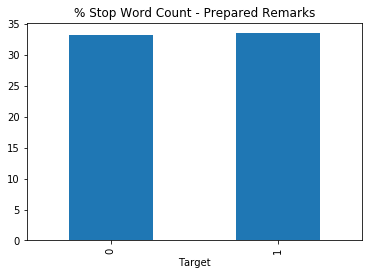

In [0]:
c1.plot.bar()
plt.title('% Stop Word Count - Prepared Remarks');

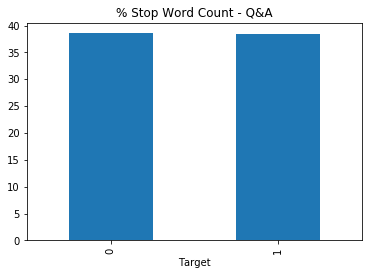

In [0]:
c2.plot.bar()
plt.title('% Stop Word Count - Q&A');

In [0]:
df_combo.groupby('Target').agg(['mean','median','std'])[['FLS_PR','DL_PR','GF_PR','SMOG_PR','FLCS_PR']].round(2)

FLS_PR              DL_PR         ... SMOG_PR       FLCS_PR             
         mean median   std  mean median  ...  median   std    mean median   std
Target                                   ...                                   
0       58.71  59.81  5.03  9.60   9.58  ...   12.20  1.00   10.11   9.96  1.25
1       58.95  57.54  5.77  9.63   9.66  ...   12.26  0.88   10.02  10.05  1.11

[2 rows x 15 columns]

In [0]:
df_combo.groupby('Target').agg(['mean','median','std'])[['FLS_QA','DL_QA','GF_QA','SMOG_QA','FLCS_QA']].round(2)

FLS_QA              DL_QA         ... SMOG_QA       FLCS_QA             
         mean median   std  mean median  ...  median   std    mean median   std
Target                                   ...                                   
0       73.22  73.59  2.75  8.33   8.31  ...   10.35  0.53    7.09   6.93  0.84
1       72.65  72.78  2.38  8.35   8.37  ...   10.33  0.49    7.21   7.08  0.77

[2 rows x 15 columns]

In [0]:
c3 = df_combo.groupby('Target').agg(['mean','median','std'])[['Words_per_sent_PR','Complex_words_PR','Long_words_PR','Wordtypes_PR']].round(2)

In [0]:
chart3_6 = df_combo.groupby('Target').agg(['mean','median','std'])[['Words_per_sent_QA','Complex_words_QA','Long_words_QA','Wordtypes_QA']].round(2)
chart3_6

Words_per_sent_QA                   ... Wordtypes_QA               
                    mean  median      std  ...         mean median     std
Target                                     ...                            
0                6030.63  6012.0  2230.67  ...      1252.20   1235  189.29
1                5265.82  5399.5  1923.01  ...      1154.05   1135  191.67

[2 rows x 12 columns]

In [0]:
c3 = chart3_6['Words_per_sent_QA']['mean']
c4 =chart3_6['Complex_words_QA']['mean']
c5 =chart3_6['Long_words_QA']['mean']
c6 =chart3_6['Wordtypes_QA']['mean']

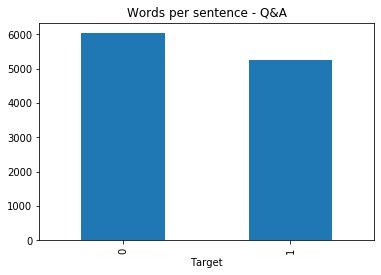

In [0]:
c3.plot.bar()
plt.title('Words per sentence - Q&A');

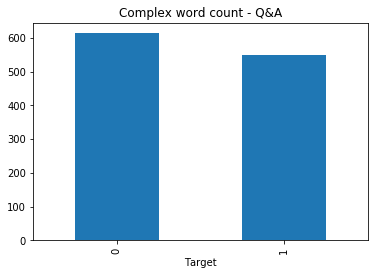

In [0]:
c4.plot.bar()
plt.title('Complex word count - Q&A');

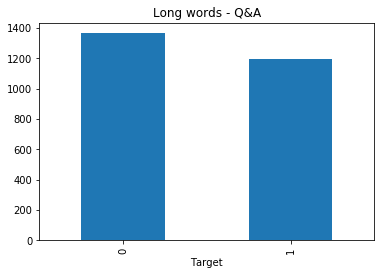

In [0]:
c5.plot.bar()
plt.title('Long words - Q&A');

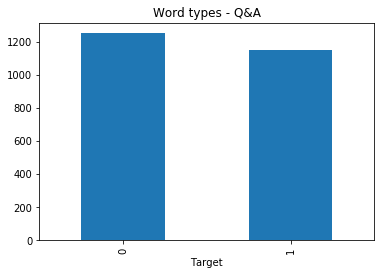

In [0]:
c6.plot.bar()
plt.title('Word types - Q&A');

In [0]:
chart7_8 = df_combo.groupby('Target').agg(['mean','median','std'])[['Long_words_QA','Wordtypes_QA']].round(2)
chart7_8

Long_words_QA                Wordtypes_QA               
                mean median     std         mean median     std
Target                                                         
0            1365.62   1281  324.45      1252.20   1235  189.29
1            1196.28   1171  286.35      1154.05   1135  191.67

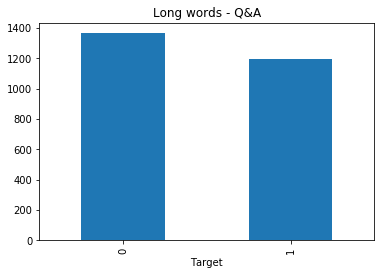

In [0]:
c7 = chart7_8['Long_words_QA']['mean']
c8 = chart7_8['Wordtypes_QA']['mean']

c7.plot.bar()
plt.title('Long words - Q&A');

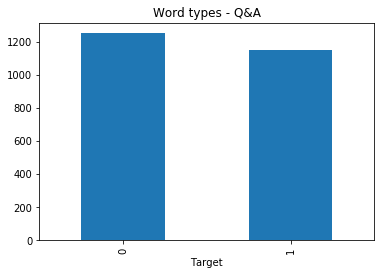

In [0]:
c8.plot.bar()
plt.title('Word types - Q&A');

## **Section 5 - Analysis - CountVectorizer/TFID models** 

In [0]:
#Isolate columns - Prep Remarks, Q&A
CV_combo_PR = df_combo.loc[:,['Prep_Remarks', 'Target']]

In [0]:
stops = list(ENGLISH_STOP_WORDS)
other_stops_words = ['https','com','www','know','help','use','new','amp', 'like', 'year', 
                     'vice', 'president','chief', 'executive', 'financial', 'turning', 'slide', 'basis', 'points', 'forward',
                     'looking', 'statement', '000', 'barrels', 'non', 'gaap', 'good', 'morning', 'investor', 'relations', 
                     'natural', 'gas','press', 'release', 'power','ii','turn', 'quarter','operator', 'instructions',
                     '2019','constant','share','100', 'joining', 'today', 'oil']

stops = stops + other_stops_words

# fit, transform, and then put the results in a dataframe - Prep remarks, Negative earnings revision group
X_train, X_test, y_train, y_test = train_test_split(CV_combo_PR['Prep_Remarks'],
                                                    CV_combo_PR['Target'],
                                                    random_state=99)

# Instantiate the model:
cvec = CountVectorizer(min_df=3, max_features = 5000, stop_words = stops, token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(2,2))

#Fit/Transform:
CV_combo_PR_vect = cvec.fit_transform(X_train)

In [0]:
#Convert X_train_vect to a dataframe - Prep remarks 
X_train_df1 = pd.DataFrame(CV_combo_PR_vect.toarray(),
                          columns = cvec.get_feature_names())
X_train_df1.head(3)

,02 expect,03 charges,04 05,05 additional,05 billion,10 10,10 15,10 30,10 available,10 billion,10 earnings,10 ended,10 filed,10 filings,10 forms,10 growth,10 million,10 organically,10 qs,10 quarterly,10 reports,10 statements,10 subsequent,10 titled,10 years,11 12,11 billion,11 driven,11 million,11 respectively,11 titled,11 turbines,110 reported,12 14,12 18,12 billion,12 million,12 month,12 months,120 million,...,wells drilled,wells online,west virginia,wholesale mortgage,wind projects,windows 10,windows commercial,windows overall,windows server,winoker communications,wolfcamp appraisal,wolfcamp pad,women men,women shoes,won satisfied,work team,work way,working capital,working closely,working number,workloads customer,world businesses,world changes,world class,world happy,world largest,world leading,world needs,world record,worth noting,wti price,xbox live,years 60,years ago,years ahead,years come,years continue,years inventory,yesterday afternoon,yield plus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,1,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# len(stops)

In [0]:
#Size/shape of CVEC dataframe -  word count(rows) by unique word (columns)
X_train_df1.shape

(60, 4646)

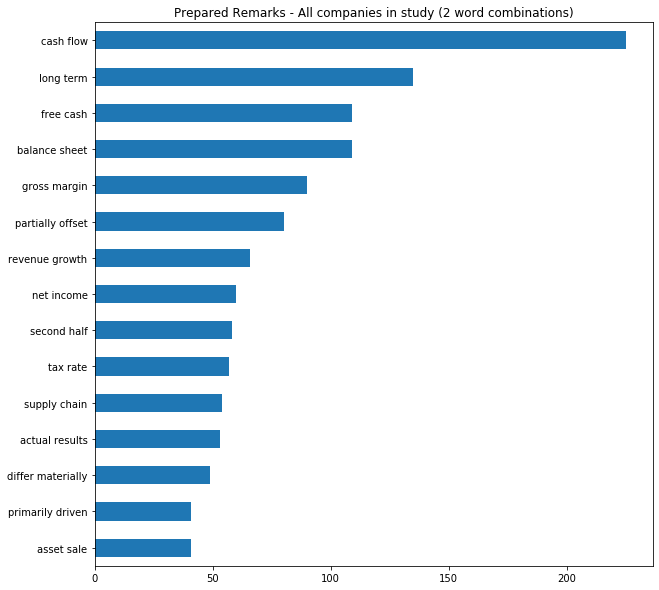

In [0]:
#Chart of top 10 words in Prepared remarks corpus - Negative earnings revision group
X_train_df1.sum().sort_values().tail(15).plot.barh(figsize = (10,10));
plt.title('Prepared Remarks - All companies in study (2 word combinations)');

In [0]:
#Isolate columns -  Q&A
CV_combo_QA = df_combo.loc[:,['QA', 'Target']]

In [0]:
stops = list(ENGLISH_STOP_WORDS)
other_stops_words = ['https','com','www','know','help','use','new','amp', 'like', 'year', 
                     'vice', 'president','chief', 'executive', 'financial', 'turning', 'slide', 'basis', 'points', 'forward',
                     'looking', 'statement', '000', 'barrels', 'non', 'gaap', 'good', 'morning', 'investor', 'relations', 
                     'natural', 'gas','press', 'release', 'power','ii','turn', 'quarter','operator', 'instructions',
                     '2019','constant','share','100', 'joining', 'today', 'oil']


stops = stops + other_stops_words

# fit, transform, and then put the results in a dataframe - Prep remarks, Negative earnings revision group
X_train, X_test, y_train, y_test = train_test_split(CV_combo_PR['Prep_Remarks'],
                                                    CV_combo_PR['Target'],
                                                    random_state=99)

# Instantiate the model:
cvec = CountVectorizer(min_df=3, max_features = 5000, stop_words = stops, token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(2,2))

#Fit/Transform:
CV_combo_QA_vect = cvec.fit_transform(X_train)

In [0]:
#Convert X_train_vect to a dataframe - Prep remarks 
X_train_df1a = pd.DataFrame(CV_combo_PR_vect.toarray(),
                          columns = cvec.get_feature_names())
X_train_df1a.head()

,02 expect,03 charges,04 05,05 additional,05 billion,10 10,10 15,10 30,10 available,10 billion,10 earnings,10 ended,10 filed,10 filings,10 forms,10 growth,10 million,10 organically,10 qs,10 quarterly,10 reports,10 statements,10 subsequent,10 titled,10 years,11 12,11 billion,11 driven,11 million,11 respectively,11 titled,11 turbines,110 reported,12 14,12 18,12 billion,12 million,12 month,12 months,120 million,...,wells drilled,wells online,west virginia,wholesale mortgage,wind projects,windows 10,windows commercial,windows overall,windows server,winoker communications,wolfcamp appraisal,wolfcamp pad,women men,women shoes,won satisfied,work team,work way,working capital,working closely,working number,workloads customer,world businesses,world changes,world class,world happy,world largest,world leading,world needs,world record,worth noting,wti price,xbox live,years 60,years ago,years ahead,years come,years continue,years inventory,yesterday afternoon,yield plus
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,1,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [0]:
#Size/shape of CVEC dataframe -  word count(rows) by unique word (columns)
X_train_df1a.shape

(60, 4646)

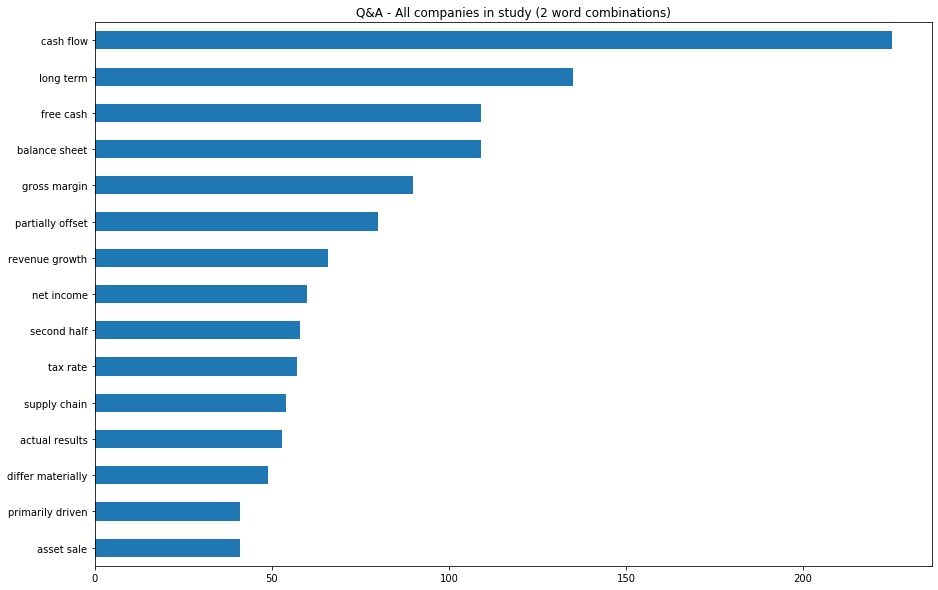

In [0]:
#Chart of top 10 words in Prepared remarks corpus - Negative earnings revision group
X_train_df1a.sum().sort_values().tail(15).plot.barh(figsize = (15,10));
plt.title('Q&A - All companies in study (2 word combinations)');

In [0]:
#Isolate columns - Prep Remarks, Q&A
CV_neg_PR = df_combo[df_combo['Target']==0][['Prep_Remarks','Target']]

In [0]:
CV_neg_PR.head(3)

,Prep_Remarks,Target
1,"OperatorGreeting, and welcome to the Antero Re...",0
2,OperatorGreetings and welcome to the Antero Re...,0
3,"OperatorGreetings, and welcome to the Antero R...",0


In [0]:
stops = list(ENGLISH_STOP_WORDS)
neg_other_stops_words = ['https','com','www','know','help','use','new','amp', 'like', 'year', 
                     'vice', 'president','chief', 'executive', 'financial', 'turning', 'slide', 'basis', 'points', 'forward',
                     'looking', 'statement', '000', 'barrels', 'non', 'gaap', 'good', 'morning', 'investor', 'relations', 
                     'natural', 'gas','press', 'release', 'power','ii','turn', 'quarter','operator', 'instructions',
                     '2019','constant','share','100', 'joining', 'today', 'oil', 'brazos', 'valley','ge', 'baker', 'manitoba', 'mont', 'billion']
                     
stops = stops + neg_other_stops_words

# fit, transform, and then put the results in a dataframe 
X_train, X_test, y_train, y_test = train_test_split(CV_neg_PR['Prep_Remarks'],
                                                    CV_neg_PR['Target']==0,
                                                    random_state=99)



# Instantiate the model:
cvec = CountVectorizer(min_df=3, max_features = 5000, stop_words = stops,token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(2,2))

#Fit/Transform:
CV_neg_PR_vect = cvec.fit_transform(X_train)

In [0]:
#Convert X_train_vect to a dataframe - Negative company Prep remarks  
X_train_df2 = pd.DataFrame(CV_neg_PR_vect.toarray(),
                          columns = cvec.get_feature_names())
X_train_df2.head()

,03 charges,10 available,10 ended,10 filed,10 million,10 organically,10 titled,11 million,11 titled,11 turbines,110 reported,12 18,12 million,12 months,13 million,14 organically,14 reported,15 million,15 organically,150 million,17 industrial,17 million,18 million,18 months,18 sequentially,20 healthcare,20 million,200 million,2018 adjusted,2018 approximately,2018 asset,2018 average,2018 consistent,2018 earnings,2018 fourth,2018 peak,2018 primarily,2018 results,2018 risk,2018 working,...,walking continuing,warren cfo,warren officer,wayne borduin,wayne wayne,webcast pleasure,website anteroresources,website earnings,website elements,website making,website note,website started,website yesterday,weeks ago,welcome antero,welcome chesapeake,welcome chevron,welcome cimarex,welcome earnings,welcome general,welcome tilray,wells culberson,wells online,wind ramp,winoker communications,winoker communicationsthanks,wolfcamp program,working capital,working closely,working number,working party,world businesses,world changes,world class,world iconic,world largest,world record,years ago,years come,yesterday afternoon
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,1,1,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train_df2.shape

(30, 2086)

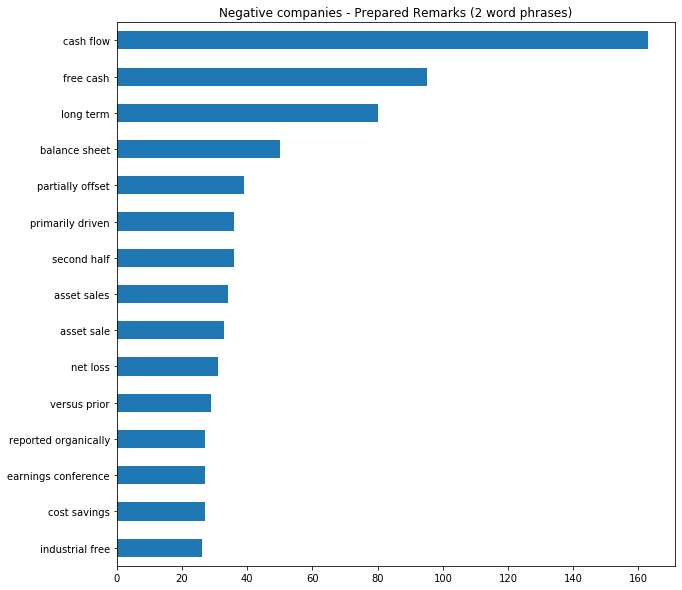

In [0]:
X_train_df2.sum().sort_values().tail(15).plot.barh(figsize = (10,10));
plt.title('Negative companies - Prepared Remarks (2 word phrases)');

In [0]:
#Isolate columns - Prep Remarks, Q&A
CV_neg_QA = df_combo[df_combo['Target']==0][['QA','Target']]

stops = list(ENGLISH_STOP_WORDS)
neg_other_stops_words = ['https','com','www','know','help','use','new','amp', 'like', 'year', 
                     'vice', 'president','chief', 'executive', 'financial', 'turning', 'slide', 'basis', 'points', 'forward',
                     'looking', 'statement', '000', 'barrels', 'non', 'gaap', 'good', 'morning', 'investor', 'relations', 
                     'natural', 'gas','press', 'release', 'power','ii','turn', 'quarter','operator', 'instructions',
                     '2019','constant','share','100', 'joining', 'today', 'oil', 'brazos', 'valley','ge', 
                     'baker', 'manitoba', 'mont', 'billion', 've', 'sachs', 'america', 'culp','kennedy', 
                     'operator', 'miller','rady', 'paul', 'glen', 'warren','comes', 'operatorthank', 
                     'senior','stanley','cowen','lawrence','singer','mark','operatorour','line','brian','wolfe',
                     'suisse','leggate','pierre','merrill', 'heikkinen','rbc','lynch', 'officer','remarks','thanks', 
                     'suntrust','II','ll','doug', 'carlos', 'vicki', 'rady', 'brendan', 'chairman']

                     
stops = stops + neg_other_stops_words

# fit, transform, and then put the results in a dataframe 
X_train, X_test, y_train, y_test = train_test_split(CV_neg_QA['QA'],
                                                    CV_neg_PR['Target']==0,
                                                    random_state=99)



# Instantiate the model:
cvec = CountVectorizer(min_df=3, max_features = 5000, stop_words = stops,token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(2,2))

#Fit/Transform:
CV_neg_QA_vect = cvec.fit_transform(X_train)

In [0]:
#Convert X_train_vect to a dataframe - Target = 0 (Profit warn), Q&A data
X_train_df3 = pd.DataFrame(CV_neg_QA_vect.toarray(),
                          columns = cvec.get_feature_names())
X_train_df3.head()

,10 barrel,10 feet,10 stocks,12 months,150 million,18 months,19 20,19 going,20 years,200 million,2018 expect,2020 2021,2020 going,2020 guidance,2020 just,2020 plan,2020 think,30 miles,300 feet,300 million,3q number,40 million,500 million,55 minutescall,60 day,60 days,64 minutescall,65 million,71 minutescall,737 max,800 million,90 days,aaron grey,ability deliver,able mitigate,able sell,accrued discounts,acreage position,acreage positions,activity just,...,weil analystokay,welles fitzpatrick,wells drilled,wells fargo,wells got,wells just,wells kind,wells look,wells online,wells really,wells seeing,wells think,wide range,wider spacing,winoker closing,winoker communicationsh,wonder just,wonder talk,wonderful day,wondering comment,wondering expect,wondering just,wondering talk,work closely,work course,work going,work hard,work really,work team,working capital,working closely,working hard,world class,world needs,xec analysisall,years ago,years just,years maybe,years think,yes think
0,0,0,3,1,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,...,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1
2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,2,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
3,0,0,3,3,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


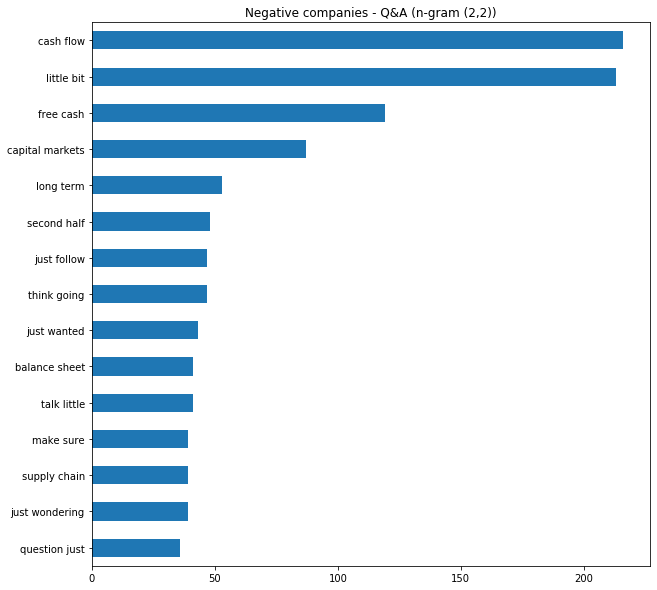

In [0]:
X_train_df3.sum().sort_values().tail(15).plot.barh(figsize = (10,10));
plt.title('Negative companies - Q&A (n-gram (2,2))');

In [0]:
#Isolate columns - Prep Remarks, Q&A
CV_pos_PR = df_combo[df_combo['Target']==1][['Prep_Remarks','Target']]

In [0]:
CV_pos_PR.head(3)

,Prep_Remarks,Target
1,OperatorThank you for standing by. Good day ev...,1
2,OperatorThank you for standing by. Good day ev...,1
3,OperatorThank you for standing by. Good day ev...,1


In [0]:
#Isolate columns - Prep Remarks, Q&A
CV_pos_PR = df_combo[df_combo['Target']==1][['Prep_Remarks','Target']]

stops = list(ENGLISH_STOP_WORDS)
other_stops_words = ['https','com','www','know','help','use','new','amp', 'like', 'year', 
                     'vice', 'president','chief', 'executive', 'financial', 'turning', 'slide', 'basis', 'points', 'forward',
                     'looking', 'statement', '000', 'barrels', 'non', 'gaap', 'good', 'morning', 'investor', 'relations', 
                     'natural', 'gas','press', 'release', 'power','ii','turn', 'quarter','operator', 'instructions', 
                     'booz','allen','365','billion','form','driven']
                     
stops = stops + other_stops_words

# fit, transform, and then put the results in a dataframe 
X_train, X_test, y_train, y_test = train_test_split(CV_pos_PR['Prep_Remarks'],
                                                    CV_pos_PR['Target']==1,
                                                    random_state=99)



# Instantiate the model:
cvec = CountVectorizer(min_df=3, max_features = 5000, stop_words = stops,token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(2,2))

#Fit/Transform:
CV_pos_PR_vect = cvec.fit_transform(X_train)

In [0]:
#Convert X_train_vect to a dataframe - Bitcoing data
X_train_df4 = pd.DataFrame(CV_pos_PR_vect.toarray(),
                          columns = cvec.get_feature_names())
X_train_df4.head()

,10 10,10 11,10 75,10 available,10 demand,10 forms,10 income,10 million,10 qs,10 quarterly,10 reports,10 statements,10 subsequent,10 today,10 years,100 million,11 increasing,12 14,12 15,12 compared,12 month,12 months,120 million,13 million,137 million,14 15,14 16,14 constant,140 155,141 million,15 constant,150 million,16 constant,18 20,19 constant,20 constant,20 million,200 million,2008 enterprise,2018 annual,...,want thank,washington metro,way return,wealth management,webcast filings,webcast live,website additional,website ask,website earnings,website expanded,website immediately,website ir,website lululemon,website making,website nick,website start,weeks ago,weighted average,welcome amazon,welcome chipotle,welcome hamilton,welcome jpmorgan,welcome lululemon,wholesale mortgage,win today,windows 10,windows commercial,windows end,windows overall,windows server,workforce business,workloads customer,world class,world events,world happy,world leading,worth noting,xbox live,years ago,years come
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


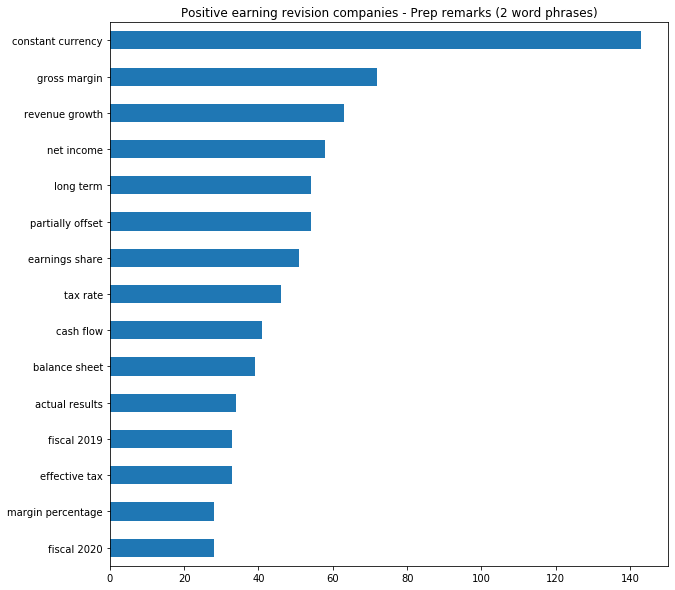

In [0]:
X_train_df4.sum().sort_values().tail(15).plot.barh(figsize = (10,10));
plt.title('Positive earning revision companies - Prep remarks (2 word phrases)');

In [0]:
#Isolate columns - Prep Remarks, Q&A
CV_pos_QA = df_combo[df_combo['Target']==1][['QA','Target']]

In [0]:
stops = list(ENGLISH_STOP_WORDS)
other_stops_words = ['https','com','www','know','help','use','new','amp', 'like', 'year', 
                     'vice', 'president','chief', 'executive', 'financial', 'turning', 'slide', 'basis', 'points', 'forward',
                     'looking', 'statement', '000', 'barrels', 'non', 'gaap', 'good', 'morning', 'investor', 'relations', 
                     'natural', 'gas','press', 'release', 'power','ii','turn', 'quarter','operator', 'instructions', 
                     'booz','allen','365','billion','form','driven', 'sachs' 'brian','stanley', 
                     'deutsche', 'cowen', 've', 'operatorthank','operatorour','horacio','wells','sachs','america','bank'
                     'merrill''analystgreat','thank','lynch','isi','niccol','rbc','lloyd','dimon','suisse','don','calvin',
                     'jamie','line', 'brian','spencer','general', 'question','carne','amy', 'senior','just','bit','bank'
                     'michael', 'fargo','jp', 'participants','manager','continue','comes','officesure','blair','piepszak',
                     'relationsthanks','analystgreat','satya', 'graseck','little','merrill','pj','smith','dumoulin',
                     'melius','goldman','parsons''remarks','copeland','thanks','sure','digital','evercore','ask','von','transcripts','miller','piper',
                     'betsy','rumohr','wolfe','transcript','closing','jefferies','julien','research', 'analysisall','II','ll', 'glass', 'mayo'
                     'vicki', 'rady', 'brendan', 'chairman']
                     
stops = stops + other_stops_words

# fit, transform, and then put the results in a dataframe 
X_train, X_test, y_train, y_test = train_test_split(CV_pos_QA['QA'],
                                                    CV_pos_QA['Target']==1,
                                                    random_state=99)

# Instantiate the model:
cvec = CountVectorizer(min_df=3, max_features = 5000, stop_words = stops,token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(2,2))

#Fit/Transform:
CV_pos_QA_vect = cvec.fit_transform(X_train)


In [0]:
#Convert X_train_vect to a dataframe - Bitcoing data
X_train_df5 = pd.DataFrame(CV_pos_QA_vect.toarray(),
                          columns = cvec.get_feature_names())
X_train_df5.head()

,10 million,10 years,100 million,12 month,12 months,18 months,20 21,20 30,20 years,2016 2017,2018 2019,2019 2020,2020 going,2020 think,37 minutescall,50 million,500 million,54 minutescall,800 million,able grow,accounting change,actually need,actually quite,actually think,add color,add value,additional access,additional capacity,additional color,additional details,addressable market,advertising advertising,advertising business,advisor returns,advisory group,afternoon congrats,afternoon congratulations,afternoon taking,ago think,ahead andrew,...,want chipotle,want emphasize,want make,want provide,want start,want talk,wanted follow,wanted understand,way lot,way think,wealth management,weeks ago,weiss morgan,william ahead,william company,william open,win business,windows oem,winslow proceed,winslow securities,women business,wondering color,wondering kind,wondering maybe,wondering offer,wondering talk,work doing,work going,work hard,work team,working hard,world going,world needs,wraps portion,yeah think,years ago,years maybe,years think,yes look,zackfia william
0,0,1,2,0,1,0,0,0,1,0,0,1,0,0,0,7,0,0,0,0,0,0,0,1,3,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,4,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,2,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0


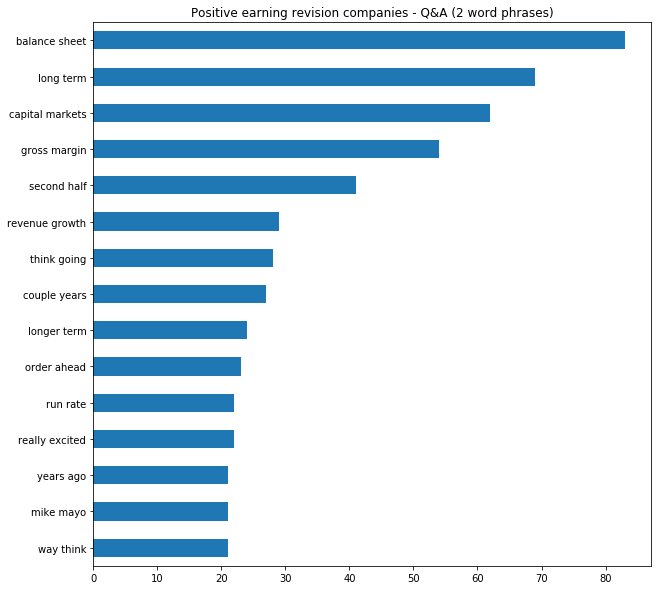

In [0]:
X_train_df5.sum().sort_values().tail(15).plot.barh(figsize = (10,10));
plt.title('Positive earning revision companies - Q&A (2 word phrases)');

In [0]:
#TfidVectorize - combined data set  

#Isolate columns - Prep Remarks, Q&A
CV_combo_PR1 = df_combo.loc[:,['Prep_Remarks', 'Target']]

stops = list(ENGLISH_STOP_WORDS)
other_stops_words = ['https','com','www','know','help','use','new','amp', 'like', 'year', 
                     'vice', 'president','chief', 'executive', 'financial', 'turning', 'slide', 'basis', 'points', 'forward',
                     'looking', 'statement', '000', 'barrels', 'non', 'gaap', 'good', 'morning', 'investor', 'relations', 
                     'natural', 'gas','press', 'release', 'power','ii','turn', 'quarter','operator', 'instructions', 
                     'booz','allen','365','billion','form','driven', 'production','gulf', 'boes']

stops = stops + other_stops_words

# fit, transform, and then put the results in a dataframe 
X_train, X_test, y_train, y_test = train_test_split(df_combo['Prep_Remarks'],
                                                    df_combo['Target'],
                                                    random_state=99)
# Instantiate the model:
tvec = TfidfVectorizer(min_df=3, max_features = 1000, stop_words = stops,token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(2,2))

#Fit/Transform:
X_train_vect1 = tvec.fit_transform(X_train)

In [0]:
#Convert X_train_vect to a dataframe
X_train_df6 = pd.DataFrame(X_train_vect1.toarray(),
                          columns = tvec.get_feature_names())
X_train_df6.head()

,04 05,10 10,10 15,10 available,10 filed,10 million,100 million,11 million,12 million,12 months,13 million,15 constant,15 million,150 million,18 million,19 million,1995 statements,20 million,200 million,2018 average,2018 earnings,2018 results,2019 2020,2019 adjusted,2019 capital,2019 conference,2019 continue,2019 earnings,2019 expect,2019 guidance,2019 outlook,2019 results,2020 2021,2020 anticipate,2020 expect,25 30,25 million,250 million,30 day,300 million,...,total capital,total company,total cost,total revenue,track achieve,track deliver,track record,uncertainties cause,uncertainties described,unearned revenue,united states,unusual items,update revise,updated presentation,value creation,value proposition,value shareholders,ve achieved,ve discussed,ve seen,vendor direct,versus prior,vicki hollub,want thank,wayne borduin,wealth management,webcast live,website fluor,website replay,weeks ago,weighted average,welcome lululemon,welcome macy,windows 10,windows server,working capital,world class,world leading,years ago,years come
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.039477,0.0,0.0,0.000000,0.0,0.0,0.0,0.098796,0.000000,0.0,0.058228,0.063250,0.000000,0.000000,0.0,0.0,0.060581,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.101758,0.000000,0.0,0.044375,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.048019,0.058228,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.041295,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058228,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.056122,0.000000
1,0.0,0.0,0.000000,0.025948,0.0,0.0,0.050726,0.0,0.0,0.000000,0.0,0.0,0.0,0.021158,0.025948,0.0,0.000000,0.000000,0.037088,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.039221,0.000000,0.000000,0.089911,0.000000,0.025948,0.0,0.0,0.0,0.000000,0.000000,0.0,0.038014,...,0.0,0.0,0.0,0.0,0.024940,0.108962,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.02494,0.017687,0.0,0.04988,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.022478,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.065316,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.053865,0.0,0.034239,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.057073,0.000000,0.053865,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.314771,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.250485,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.117734,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.139179,0.0,0.0,0.000000,0.0,0.0,0.0,0.116104,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.071742,0.000000,0.000000,0.000000,0.053492,0.000000,0.0,0.0,0.0,0.000000,0.059792,0.0,0.052150,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.074331,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.059792,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.191147,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.035905,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.040465,0.000000,0.038758,0.0,0.0,0.000000,0.0,0.0,0.030721,0.0,0.019528,0.059792,0.033574,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.028390,...,0.0,0.0,0.0,0.0,0.037252,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.034686,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.035905


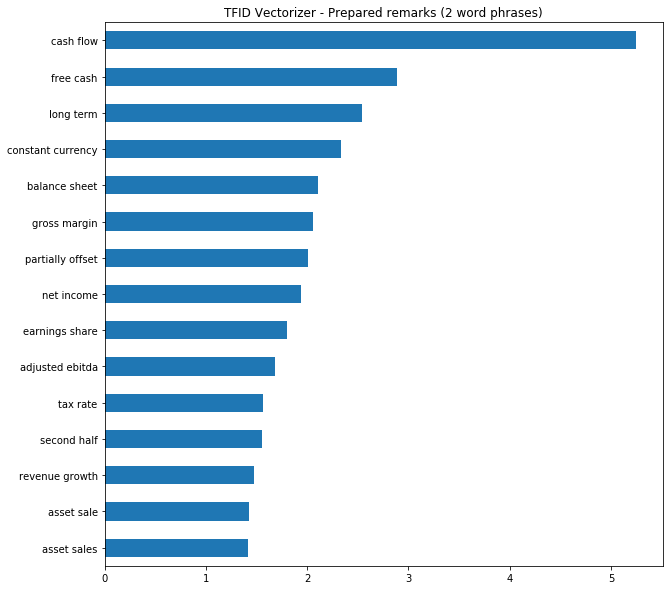

In [0]:
X_train_df6.sum().sort_values().tail(15).plot.barh(figsize = (10,10));
plt.title('TFID Vectorizer - Prepared remarks (2 word phrases)');

## **Section 6 - Classification models & analysis**

**1.   Logistic regression (LR) - CountVectorizer**




In [0]:
# fit, transform, and then put the results in a dataframe - df_combo(all companies, Prep remarks & Targets) 
X_train_PR, X_test_PR, y_train_PR, y_test_PR = train_test_split(df_combo['Prep_Remarks'],
                                                    df_combo['Target'],
                                                    random_state=99)

In [0]:
logisticCV_pipe = Pipeline([('CV', CountVectorizer()), ('LR', LogisticRegression())])
logisticCV_params = {
    'CV__min_df' : [1,3,5,7],
    'CV__stop_words' : [stops],
    'CV__ngram_range': [(1,1),(1,2),(2,2),(3,3)],
    'CV__token_pattern':['(?u)\\b\\w\\w+\\b'],
    'LR__penalty' : ['l2'],
    'LR__C' : [.1,.5,1,5,50],
    'LR__solver':['lbfgs'], 
}
LRCVPR_gs = GridSearchCV(logisticCV_pipe, logisticCV_params, cv = 5, verbose=0)
LRCVPR_gs.fit(X_train_PR, y_train_PR);

In [0]:
(LRCVPR_gs.best_params_);

In [0]:
LRCVPR_gs_model = LRCVPR_gs.best_estimator_

In [0]:
# Score model on training set.
print("LR CountVectorizer best score (all PR) - train:",LRCVPR_gs.best_score_)

LR CountVectorizer best score (all PR) - train: 1.0


In [0]:
# fit, transform, and then put the results in a dataframe - df_combo(all companies, Q&A & Targets)
X_train_QA, X_test_QA, y_train_QA, y_test_QA = train_test_split(df_combo['QA'],
                                                    df_combo['Target'],
                                                    random_state=99)

In [0]:
logisticCV_pipe = Pipeline([('CV', CountVectorizer()), ('LR', LogisticRegression())])
logisticCV_params = {
    'CV__min_df' : [1,3,5,7],
    'CV__stop_words' : [stops],
    'CV__ngram_range': [(1,1),(1,2),(2,2),(3,3)],
    'CV__token_pattern':['(?u)\\b\\w\\w+\\b'],
    'LR__penalty' : ['l2'],
    'LR__C' : [.1,.5,1,5,50],
    'LR__solver':['lbfgs'], 
}
LRCVQA_gs = GridSearchCV(logisticCV_pipe, logisticCV_params, cv = 5, verbose=0)
LRCVQA_gs.fit(X_train_QA, y_train_QA);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
(LRCVQA_gs.best_params_);

In [0]:
LRCVQA_gs_model = LRCVQA_gs.best_estimator_

In [0]:
# Score model on training set.
print("LR CountVectorizer best score (all QA) - train:",LRCVQA_gs.best_score_)

LR CountVectorizer best score (all QA) - train: 1.0


**2.   LR - TFID**

In [0]:
logisticTF_pipe = Pipeline([('TF', TfidfVectorizer()),('LR', LogisticRegression())])
logisticTF_params = {
    'TF__stop_words' : [stops, None],
    'TF__ngram_range': [(1,1),(1,2),(2,2),(3,3)],
    'TF__token_pattern':['(?u)\\b\\w\\w+\\b'],
    'LR__penalty' : ['l2'],
    'LR__C' : [.1,1,5],
    'LR__solver':['lbfgs'],
}
LRTFPR_gs = GridSearchCV(logisticTF_pipe, logisticTF_params, cv = 5, verbose=0)
LRTFPR_gs.fit(X_train_PR, y_train_PR);

In [0]:
LRTFPR_gs.best_params_;

In [0]:
logisticTF_pipe = Pipeline([('TF', TfidfVectorizer()),('LR', LogisticRegression())])
logisticTF_params = {
    'TF__stop_words' : [stops, None],
    'TF__ngram_range': [(1,1),(1,2),(2,2),(3,3)],
    'TF__token_pattern':['(?u)\\b\\w\\w+\\b'],
    'LR__penalty' : ['l2'],
    'LR__C' : [.1,1,5],
    'LR__solver':['lbfgs'],
}
LRTFQA_gs = GridSearchCV(logisticTF_pipe, logisticTF_params, cv = 5, verbose=0)
LRTFQA_gs.fit(X_train_QA, y_train_QA);

In [0]:
LRTFQA_gs.best_params_;

**3.   LR - BayesCV**

In [0]:
NBCV_pipe = Pipeline([('CV', CountVectorizer()) , ('NB', MultinomialNB())])
NBCV_params = {
    'CV__min_df' : [3,4,8],
    'CV__stop_words' : [stops, None],
    'NB__alpha' : [ 0.01, 0.1, 0.5, 0.8]
}
NBCVPR_gs = GridSearchCV(NBCV_pipe, NBCV_params, cv = 5, verbose=0)
NBCVPR_gs.fit(X_train_PR, y_train_PR);

In [0]:
NBCVPR_gs.best_params_;

In [0]:
NBCV_pipe = Pipeline([('CV', CountVectorizer()) , ('NB', MultinomialNB())])
NBCV_params = {
    'CV__min_df' : [3,4,8],
    'CV__stop_words' : [stops, None],
    'NB__alpha' : [ 0.01, 0.1, 0.5, 0.8]
}
NBCVQA_gs = GridSearchCV(NBCV_pipe, NBCV_params, cv = 5, verbose=0)
NBCVQA_gs.fit(X_train_QA, y_train_QA);

In [0]:
NBCVQA_gs.best_params_;

**4. Bayes - TFID**

In [0]:
NBTF_pipe = Pipeline([('TF', TfidfVectorizer()),('NB', MultinomialNB())])
NBTF_params = {
    'TF__stop_words' : [stops, None],
    'NB__alpha' : [0.01, 0.1, 0.5, 0.8,1]
}
NBTFPR_gs = GridSearchCV(NBTF_pipe, NBTF_params, cv = 5, verbose=0)
NBTFPR_gs.fit(X_train_PR, y_train_PR);

In [0]:
NBTFPR_gs.best_params_;

In [0]:
NBTF_pipe = Pipeline([('TF', TfidfVectorizer()),('NB', MultinomialNB())])
NBTF_params = {
    'TF__stop_words' : [stops, None],
    'NB__alpha' : [0.01, 0.1, 0.5, 0.8,1]
}
NBTFQA_gs = GridSearchCV(NBTF_pipe, NBTF_params, cv = 5, verbose=0)
NBTFQA_gs.fit(X_train_QA, y_train_QA);

In [0]:
NBTFQA_gs.best_params_;

**5. Random Forest Model/CV**

In [0]:
## Random Forest Model - CountV
cv = CountVectorizer(stop_words = stops)
X_train_cv = cv.fit_transform(X_train_PR)

In [0]:
forest = RandomForestClassifier()
forest_params = {
    'n_estimators' : [5, 10, 15],
    'max_depth' : [5, 10, 15],
    'max_features' : ['auto']
    
}
RFCVPR_gs_forest = GridSearchCV(forest, param_grid = forest_params, cv = 5)
RFCVPR_gs_forest.fit(X_train_cv, y_train_PR);

In [0]:
RFCVPR_gs_forest.best_params_;

In [0]:
## Random Forest Model - CountV
cv = CountVectorizer(stop_words = stops)
X_train_cv = cv.fit_transform(X_train_QA)

In [0]:
forest = RandomForestClassifier()
forest_params = {
    'n_estimators' : [5, 10, 15],
    'max_depth' : [5, 10, 15],
    'max_features' : ['auto']
    
}
RFCVQA_gs_forest = GridSearchCV(forest, param_grid = forest_params, cv = 5)
RFCVQA_gs_forest.fit(X_train_cv, y_train_QA);

In [0]:
RFCVQA_gs_forest.best_params_;

**6. Random Forest Model - TFID**


In [0]:
## Random Forest Model - TFID
tvec = TfidfVectorizer()
X_train_tvec = tvec.fit_transform(X_train_PR)

In [0]:
forest = RandomForestClassifier()
forest_params = {
    'n_estimators' : [5, 10, 15],
    'max_depth' : [5, 10, 15],
    'max_features' : ['auto']
}
RFTFPR_gs_forest1 = GridSearchCV(forest, param_grid = forest_params, cv = 5)
RFTFPR_gs_forest1.fit(X_train_tvec, y_train_PR);

In [0]:
RFTFPR_gs_forest1.best_params_;

In [0]:
## Random Forest Model - TFID
tvec1 = TfidfVectorizer()
X_train_tvec1 = tvec.fit_transform(X_train_QA)

In [0]:
forest = RandomForestClassifier()
forest_params = {
    'n_estimators' : [5, 10, 15],
    'max_depth' : [5, 10, 15],
    'max_features' : ['auto']
}
RFTFQA_gs_forest1 = GridSearchCV(forest, param_grid = forest_params, cv = 5)
RFTFQA_gs_forest1.fit(X_train_tvec1, y_train_QA);

In [0]:
RFTFQA_gs_forest1.best_params_;

***7. SVM Model - CV***

In [0]:
from sklearn.svm import SVC

# Instantiate SVM - CV
svc = SVC(
    C = 100,
    kernel = "rbf",
    gamma = "scale"
)

# # Fit support vector machine to training data.
svc.fit(CV_combo_PR_vect, y_train_PR)
svc1 = svc.score(CV_combo_PR_vect, y_train_PR)
svc1

1.0

In [0]:
from sklearn.svm import SVC

# Instantiate SVM - CV
svc = SVC(
    C = 100,
    kernel = "rbf",
    gamma = "scale"
)

# # Fit support vector machine to training data.
svc.fit(CV_combo_PR_vect, y_train_PR)
svc2 = svc.score(CV_combo_QA_vect, y_train_QA)
svc2

1.0

**8. SVM Model - TFID**

In [0]:
## Random Forest Model - TFID
tvec = TfidfVectorizer()
X_train_tvec2 = tvec.fit_transform(X_train_PR)

In [0]:
# Instantiate SVM - TFID
svc = SVC(
    C = 100,
    kernel = "rbf",
    gamma = "scale"
)

# # Fit support vector machine to training data.
svc.fit(X_train_tvec2, y_train_PR)
svc3 = svc.score(X_train_tvec2, y_train_PR)
svc3

1.0

In [0]:
## Random Forest Model - TFID
tvec = TfidfVectorizer()
X_train_tvec3 = tvec.fit_transform(X_train_QA)

In [0]:
# Instantiate SVM - TFID
svc = SVC(
    C = 100,
    kernel = "rbf",
    gamma = "scale"
)

# # Fit support vector machine to training data.
svc.fit(X_train_tvec3, y_train_QA)
svc4 = svc.score(X_train_tvec3, y_train_QA)
svc4

1.0

In [0]:
########

In [0]:
print('Best score - CountV with LR (PR):', LRCVPR_gs.best_score_.round(3))
print('Best score - CountV with LR (QA):', LRCVQA_gs.best_score_.round(3))
print('----------------------')

print('Best score - TFID with LR (PR):', LRTFPR_gs.best_score_.round(3))
print('Best score - TFID with LR (QA):', LRTFQA_gs.best_score_.round(3))
print('----------------------')

print('Best score - Random ForestCV (PR): ',RFCVPR_gs_forest.best_score_.round(3))
print('Best score - Random ForestCV (QA): ',RFCVQA_gs_forest.best_score_.round(3))
print('----------------------')

print('Best score - Random ForestTV (PR): ',RFTFPR_gs_forest1.best_score_.round(3))
print('Best score - Random ForestTV (QA): ',RFTFQA_gs_forest1.best_score_.round(3))
print('----------------------')

print('Best score - CountV with Multinomial Bayes (PR):', NBCVPR_gs.best_score_.round(3))
print('Best score - CountV with Multinomial Bayes (QA):', NBCVQA_gs.best_score_.round(3))
print('----------------------')

print('Best score - TFDIF with with Multinomial Bayes (PR):', NBTFPR_gs.best_score_.round(2))
print('Best score - TFDIF with with Multinomial Bayes (QA):', NBTFQA_gs.best_score_.round(2))
print('----------------------')

print('Best score - SVC with CV (PR):', svc1.round(2))
print('Best score - SVC with CV (QA):', svc2.round(2))
print('----------------------')

print('Best score - SVC with TFID (PR):', svc3.round(2))
print('Best score - SVC with TFID (QA):', svc4.round(2))

Best score - CountV with LR (PR): 1.0
Best score - CountV with LR (QA): 1.0
----------------------
Best score - TFID with LR (PR): 1.0
Best score - TFID with LR (QA): 0.983
----------------------
Best score - Random ForestCV (PR):  0.85
Best score - Random ForestCV (QA):  0.783
----------------------
Best score - Random ForestTV (PR):  0.867
Best score - Random ForestTV (QA):  0.733
----------------------
Best score - CountV with Multinomial Bayes (PR): 0.967
Best score - CountV with Multinomial Bayes (QA): 0.95
----------------------
Best score - TFDIF with with Multinomial Bayes (PR): 1.0
Best score - TFDIF with with Multinomial Bayes (QA): 0.97
----------------------
Best score - SVC with CV (PR): 1.0
Best score - SVC with CV (QA): 1.0
----------------------
Best score - SVC with TFID (PR): 1.0
Best score - SVC with TFID (QA): 1.0


## **Section 7 - Fitting models (vectorizers)**


In [0]:
LR = LogisticRegression(C = 0.2, penalty = 'l2')  
LRCVPR_gs.fit(X_train_PR, y_train_PR)
preds_PR = LRCVPR_gs.predict(X_test_PR)

In [0]:
#adjust score based on best model - PR
print('accuracy score of LR-CVEC on testing data (PR): ', LRCVPR_gs.score(X_test_PR, y_test_PR).round(2))
print('accuracy score of LR-CVEC on testing data (PR): ', accuracy_score(preds_PR, y_test_PR).round(2))


accuracy score of LR-CVEC on testing data (PR):  1.0
accuracy score of LR-CVEC on testing data (PR):  1.0


In [0]:
all_probs = LRCVPR_gs.predict_proba(X_test_PR) 
x = all_probs[:10].round(3) 
x*100

array([[  0.2,  99.8],
       [ 77.6,  22.4],
       [100. ,   0. ],
       [  1.9,  98.1],
       [  6.5,  93.5],
       [  0.8,  99.2],
       [ 99.5,   0.5],
       [ 90.7,   9.3],
       [ 99. ,   1. ],
       [100. ,   0. ]])

In [0]:
LR = LogisticRegression(C = 0.5, penalty = 'l2')  
LRCVQA_gs.fit(X_train_QA, y_train_QA)
preds_QA = LRCVQA_gs.predict(X_test_QA)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
#adjust score based on best model - QA
print('accuracy score of LR-CVEC on testing data (QA): ', LRCVQA_gs.score(X_test_QA, y_test_QA).round(2))
print('accuracy score of LR-CVEC on testing data (QA): ', accuracy_score(preds_QA, y_test_QA).round(2))

accuracy score of LR-CVEC on testing data (QA):  1.0
accuracy score of LR-CVEC on testing data (QA):  1.0


In [0]:
all_probs = LRCVQA_gs.predict_proba(X_test_QA) 
y = all_probs[:10]
y*100

array([[ 0.41583211, 99.58416789],
       [86.23981776, 13.76018224],
       [77.13949578, 22.86050422],
       [ 0.66123587, 99.33876413],
       [ 0.71167284, 99.28832716],
       [ 2.50443385, 97.49556615],
       [96.91347965,  3.08652035],
       [72.8429714 , 27.1570286 ],
       [99.02165175,  0.97834825],
       [98.20317482,  1.79682518]])

In [0]:
df_combo['Prep_Remarks'].iloc[15]

"OperatorLadies and gentlemen, please standby. Good afternoon, and welcome to the Fluor Corporation's First Quarter 2019 Earnings Conference Call. Today's conference is being recorded. At this time, all participants are in a listen-only mode. A question-and-answer session will follow management's presentation.A replay of today's conference call will be available at approximately 10 a.m. Eastern Time today, accessible on Fluor's website at investor.fluor.com. The web replay will be available for 30 days. A telephone replay will be available through 7:30 p.m. Eastern Time today, on May 9th, and will follow -- following the telephone -- at the following telephone number (888) 203-1112. The passcode of 9132841 will be required.At this time, for opening remarks and introductions, I would like to turn the call over to Mr. Jason Landkamer, Director of Investor Relations. Please go ahead.Jason Landkamer -- Director of Investor RelationsThanks, Jake, and welcome to Fluor's first quarter 2019 co

In [0]:
df_combo['QA'].iloc[40]

"OperatorAt this time, we will now open up the call for questions. We ask each caller; please limit yourself to one question. If you would like to ask a question, please press *1 on your keypad. We ask that when you pose your question, you pick up your handsets to provide optimum sound quality. Once again, to initiate a question, please press * then 1 on your touchtone telephone at this time. Please hold while we pull for your questions.Thank you. Our first question comes from the line of Justin Post with Merrill Lynch. Please proceed with your question.Justin Post -- Merrill Lynch -- AnalystGreat, thank you. I guess I'll ask about units; 14% in the quarter. How do you feel about the overall unit growth here given that growth was higher last year in the 20s? Do you think there's some investments you can make in other areas to kinda reaccelerate that going forward?And then secondly, just if you could remind us or help us understand the Prime accounting change impact on subscription reve

## **Section 8 - Confusion Matrix**

In [0]:
confusion_matrix(y_test_PR, preds_PR)
print('CR',
      classification_report(y_test_PR, preds_PR))

CR               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [0]:
cols = ['Predict PW', 'Predict NPW']
rows = ['Actual  PW', 'Actual NPW']

pd.DataFrame(confusion_matrix(y_test_PR, preds_PR), columns = cols, index=rows)

,Predict PW,Predict NPW
Actual PW,11,0
Actual NPW,0,9


In [0]:
confusion_matrix(y_test_QA, preds_QA)
print('CR',
      classification_report(y_test_QA, preds_QA))

CR               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [0]:
cols = ['Predict PW', 'Predict NPW']
rows = ['Actual  PW', 'Actual NPW']

pd.DataFrame(confusion_matrix(y_test_QA, preds_QA), columns = cols, index=rows)

,Predict PW,Predict NPW
Actual PW,11,0
Actual NPW,0,9


## **Section 8 - Coefficient of key words**

In [0]:
#Get features of CVLR  
LRfeat = LRCVPR_gs.best_estimator_.steps[0][1].get_feature_names() 

In [0]:
# Coefficients for best model
coeff = LRCVPR_gs.best_estimator_.steps[1][1].coef_[0]

In [0]:
final = pd.DataFrame({'Coefficients':coeff, 'Features/Words':LRfeat})
final['abs_coeffs'] = final['Coefficients'].abs()

In [0]:
final.sort_values(by='abs_coeffs', ascending=False).head(10).reset_index()

,index,Coefficients,Features/Words,abs_coeffs
0,1981,-0.084181,day,0.084181
1,3259,-0.082445,guidance,0.082445
2,2714,-0.077239,expect,0.077239
3,1348,-0.076289,cash,0.076289
4,2956,-0.070859,fluor,0.070859
5,5208,-0.070814,project,0.070814
6,4082,-0.067992,lower,0.067992
7,5885,-0.067217,sales,0.067217
8,899,-0.066478,asset,0.066478
9,4630,-0.064221,oil,0.064221


In [0]:
# final.drop(columns='Coefficients', inplace = True)
final.sort_values(by='abs_coeffs', ascending=False).head(10).reset_index()


,index,Coefficients,Features/Words,abs_coeffs
0,1981,-0.084181,day,0.084181
1,3259,-0.082445,guidance,0.082445
2,2714,-0.077239,expect,0.077239
3,1348,-0.076289,cash,0.076289
4,2956,-0.070859,fluor,0.070859
5,5208,-0.070814,project,0.070814
6,4082,-0.067992,lower,0.067992
7,5885,-0.067217,sales,0.067217
8,899,-0.066478,asset,0.066478
9,4630,-0.064221,oil,0.064221


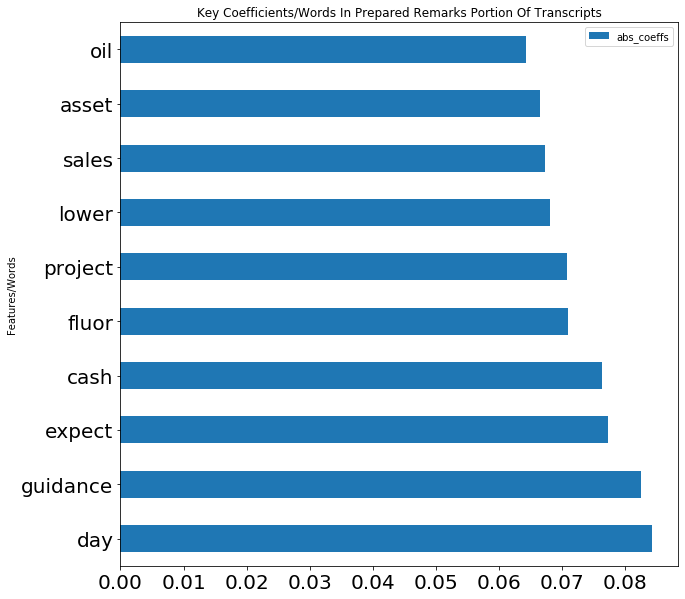

In [0]:
top_final = final.sort_values(by='abs_coeffs',ascending=False).head(10)
top_final.plot.barh(x='Features/Words',y='abs_coeffs',figsize=(10,10), 
                   title = "Key coefficients/words in Prepared remarks portion of transcripts".title(), fontsize = 20,);

In [0]:
#Get features of CVLR  
LRfeat = LRCVQA_gs.best_estimator_.steps[0][1].get_feature_names() 

In [0]:
# Coefficients for best model
coeff = LRCVQA_gs.best_estimator_.steps[1][1].coef_[0]

In [0]:
final = pd.DataFrame({'Coefficients':coeff, 'Features/Words':LRfeat})
final['abs_coeffs'] = final['Coefficients'].abs()

In [0]:
final.sort_values(by='abs_coeffs', ascending=False).head(10).reset_index()

,index,Coefficients,Features/Words,abs_coeffs
0,14650,-0.100537,cash flow,0.100537
1,36790,-0.063420,gennette chairman,0.063420
2,97782,-0.063151,vicki hollub,0.063151
3,11949,-0.062802,brendan kennedy,0.062802
4,73317,-0.058295,rady chairman,0.058295
5,80659,0.055416,scott sheffield,0.055416
6,65033,-0.054815,paul rady,0.054815
7,14457,-0.054144,carlos hernandez,0.054144
8,42849,0.053403,horacio rozanski,0.053403
9,12001,0.052580,brian niccol,0.052580


In [0]:
final.drop(columns='Coefficients', inplace = True)
final.sort_values(by='abs_coeffs', ascending=False).head(10).reset_index()

,index,Features/Words,abs_coeffs
0,14650,cash flow,0.100537
1,36790,gennette chairman,0.063420
2,97782,vicki hollub,0.063151
3,11949,brendan kennedy,0.062802
4,73317,rady chairman,0.058295
5,80659,scott sheffield,0.055416
6,65033,paul rady,0.054815
7,14457,carlos hernandez,0.054144
8,42849,horacio rozanski,0.053403
9,12001,brian niccol,0.052580


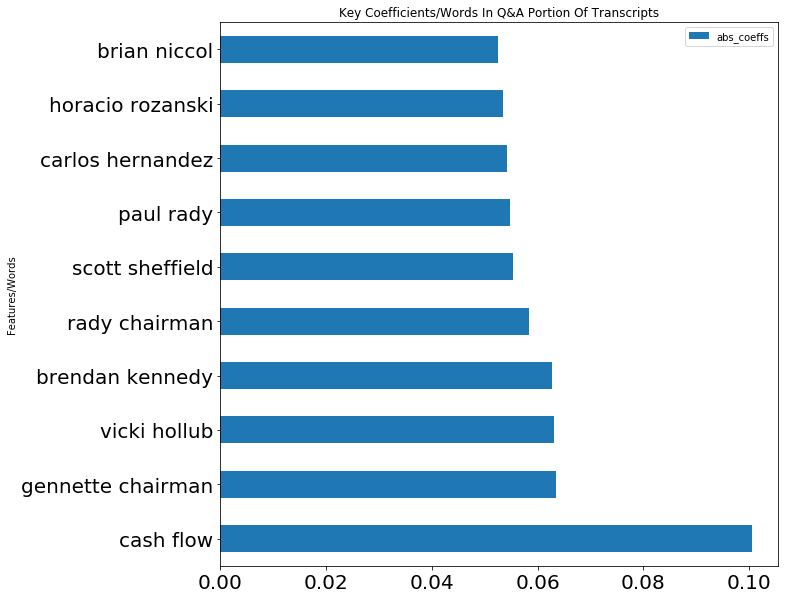

In [0]:
top_final = final.sort_values(by='abs_coeffs',ascending=False).head(10)
top_final.plot.barh(x='Features/Words',y='abs_coeffs',figsize=(10,10), 
                   title = "Key coefficients/words in Q&A portion of transcripts".title(), fontsize = 20,);

ROC Curves

In [0]:
#get probabilities from X_test data based on LR & CV model
probability = LRCVPR_gs.predict_proba(X_test)[:,1]

In [0]:
# LRCV_gs.predict_proba(X_test)
# probability

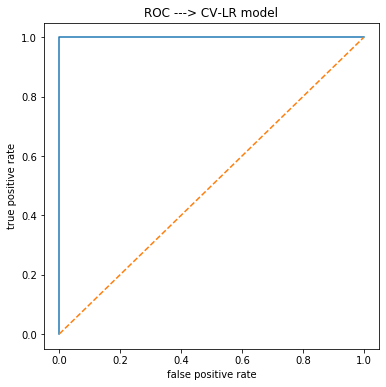

In [0]:
fpr, tpr, _ = roc_curve(y_test, probability)

plt.figure(figsize = (6,6))
plt.plot(fpr, tpr);
plt.plot([0,max(y_test)],[0, max(y_test)], '--');  
plt.title('ROC ---> CV-LR model') 
plt.xlabel('false positive rate')  
plt.ylabel('true positive rate'); 

## **Section 9 - Sentiment analysis**

In [0]:
def polarity(text):
    import pysentiment as ps
    lm = ps.LM()
    tokens = lm.tokenize(text)
    score = lm.get_score(tokens)
    return score['Polarity']

def subjectivity(text):
    import pysentiment as ps
    lm = ps.LM()
    tokens = lm.tokenize(text)
    score = lm.get_score(tokens)
    return score['Subjectivity']

In [0]:
# https://pypi.org/project/pysentiment/0.1/
# https://sraf.nd.edu/textual-analysis/


df_combo['LM_Polarity_PR'] = ""
df_combo['LM_Subjectivity_PR'] = ""

df_combo['LM_Polarity_QA'] = ""
df_combo['LM_Subjectivity_QA'] = ""

##Loughran and McDonald dictionary
# def polarity(x):
#     sent = TextBlob.sentiment()
#     tokens = sent.tokenize(x)
#     score = sent.get_score(tokens)
#     return score['Polarity']

# def subjectivity(y):
#     sent = TextBlob.sentiment()
#     tokens = sent.tokenize(y)
#     score = sent.get_score(tokens)
#     return score['Subjectivity']
    
for index, value in df_combo['Prep_Remarks'].items():
  df_combo.loc[index, 'LM_Polarity_PR'] = polarity(value) 
  df_combo.loc[index, 'LM_Subjectivity_PR'] = subjectivity(value) 

for index, value in df_combo['QA'].items():
  df_combo.loc[index, 'LM_Polarity_QA'] = polarity(value)
  df_combo.loc[index, 'LM_Subjectivity_QA'] = subjectivity(value) 



FileNotFoundError: ignored

In [0]:
chart_pol = df_combo.groupby('Target').agg(['mean','median','std'])[['LM_Polarity_PR','LM_Subjectivity_PR','LM_Polarity_QA','LM_Subjectivity_QA']].round(2)
chart_pol

cp1 = chartpol['LM_Polarity_PR','LM_Subjectivity_PR']['mean']

cp1.plot.bar()
plt.title('Polarity/Subjectivity - Prepared Remarks');

In [0]:
from google.colab import files
uploaded = files.upload()

from google.colab import drive 
drive.mount('/content/gdrive')

df_lm=pd.read_csv('gdrive/My Drive/CapstoneGA/LoughranMcDonald_SentimentWordLists_2018.xlsx - Documentation.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


ParserError: ignored

In [0]:
df_combo['LM_Polarity_PR'] = ""
df_combo['LM_Subjectivity_PR'] = ""

df_combo['LM_Polarity_QA'] = ""
df_combo['LM_Subjectivity_QA'] = ""

##LM dictionary of key words
def polarity(x):
    lm = ps.LM()
    tokens = lm.tokenize(x)
    score = lm.get_score(tokens)
    return score['Polarity']

def subjectivity(y):
    lm = ps.LM()
    tokens = lm.tokenize(y)
    score = lm.get_score(tokens)
    return score['Subjectivity']
    

def LM_key_words(x):
    # words = clean_padding(text)
    n= len(words)
    LM_key_w= {'positive':[w.lower() for w in words if w in pos_l],
               'negative':[w.lower() for w in words if w in neg_l],
               'uncertainty':[w.lower() for w in words if w in unc_l],
               'litigious':[w.lower() for w in words if w in lit_l],
               'constraint':[w.lower() for w in words if w in cons_l],
               'superflous':[w.lower() for w in words if w in sup_l],
               'interesting':[w.lower() for w in words if w in int_l],
               'strong_modal':[w.lower() for w in words if w in strong_mod_l],
               'mid_modal':[w.lower() for w in words if w in mid_mod_l],
               'weak_modal':[w.lower() for w in words if w in weak_mod_l],
               'irreg_verbs':[w.lower() for w in words if w in irv_l]
              }
    return LM_key_w

for index, value in df_combo['Prep_Remarks'].items():
  df_combo.loc[index, 'LM_Polarity_PR'] = polarity(value) 
  df_combo.loc[index, 'LM_Subjectivity_PR'] = subjectivty(value) 

for index, value in df_combo['QA'].items():
  df_combo.loc[index, 'LM_Polarity_QA'] = polarity(value)
  df_combo.loc[index, 'LM_Subjectivity_QA'] = subjectivty((value) 

def LM_label_pct(text):
    words = clean_padding(text)
    n= len(words)
    LM_label_p= {'positive':float(len([w for w in words if w in pos_l]))/n,
               'negative':float(len([w for w in words if w in neg_l]))/n,
               'uncertainty':float(len([w for w in words if w in unc_l]))/n,
               'litigious':float(len([w for w in words if w in lit_l]))/n,
               'constraint':float(len([w for w in words if w in cons_l]))/n,
               'superflous':float(len([w for w in words if w in sup_l]))/n,
               'interesting':float(len([w for w in words if w in int_l]))/n,
               'strong_modal':float(len([w for w in words if w in strong_mod_l]))/n,
               'mid_modal':float(len([w for w in words if w in mid_mod_l]))/n,
               'weak_modal':float(len([w for w in words if w in weak_mod_l]))/n,
               'irreg_verbs':float(len([w for w in words if w in irv_l]))/n
              }
    return LM_label_p

for index, value in df_combo['Prep_Remarks'].items():
  df_combo.loc[index, 'LM_Polarity_PR'] = polarity(value) 
  df_combo.loc[index, 'LM_Subjectivity_PR'] = subjectivty(value) 

for index, value in df_combo['QA'].items():
  df_combo.loc[index, 'LM_Polarity_QA'] = polarity(value)
  df_combo.loc[index, 'LM_Subjectivity_QA'] = subjectivty((value) 


def LM_label_pct_rel(text):
    words = clean_padding(text)
    LM_label_p_rel= {'positive':float(len([w for w in words if w in pos_l])),
               'negative':float(len([w for w in words if w in neg_l])),
               'uncertainty':float(len([w for w in words if w in unc_l])),
               'litigious':float(len([w for w in words if w in lit_l])),
               'constraint':float(len([w for w in words if w in cons_l])),
               'superflous':float(len([w for w in words if w in sup_l])),
               'interesting':float(len([w for w in words if w in int_l])),
               'strong_modal':float(len([w for w in words if w in strong_mod_l])),
               'mid_modal':float(len([w for w in words if w in mid_mod_l])),
               'weak_modal':float(len([w for w in words if w in weak_mod_l])),
               'irreg_verbs':float(len([w for w in words if w in irv_l]))
              }
    n = np.sum(LM_label_p_rel.values())
    LM_label_p_rel= {'positive':float(len([w for w in words if w in pos_l]))/n,
               'negative':float(len([w for w in words if w in neg_l]))/n,
               'uncertainty':float(len([w for w in words if w in unc_l]))/n,
               'litigious':float(len([w for w in words if w in lit_l]))/n,
               'constraint':float(len([w for w in words if w in cons_l]))/n,
               'superflous':float(len([w for w in words if w in sup_l]))/n,
               'interesting':float(len([w for w in words if w in int_l]))/n,
               'strong_modal':float(len([w for w in words if w in strong_mod_l]))/n,
               'mid_modal':float(len([w for w in words if w in mid_mod_l]))/n,
               'weak_modal':float(len([w for w in words if w in weak_mod_l]))/n,
               'irreg_verbs':float(len([w for w in words if w in irv_l]))/n
              }
    
    return LM_label_p_rel

 for index, value in df_combo['Prep_Remarks'].items():
  df_combo.loc[index, 'LM_Polarity_PR'] = polarity(value) 
  df_combo.loc[index, 'LM_Subjectivity_PR'] = subjectivty(value) 

for index, value in df_combo['QA'].items():
  df_combo.loc[index, 'LM_Polarity_QA'] = polarity(value)
  df_combo.loc[index, 'LM_Subjectivity_QA'] = subjectivty((value) 
   

In [0]:
df_combo.describe(include=np.number)
#include a correlation matrix for all the LM metrix

## **Section 10 - Principal component analysis (PCA)**

## **Section 11 - Word clouds**

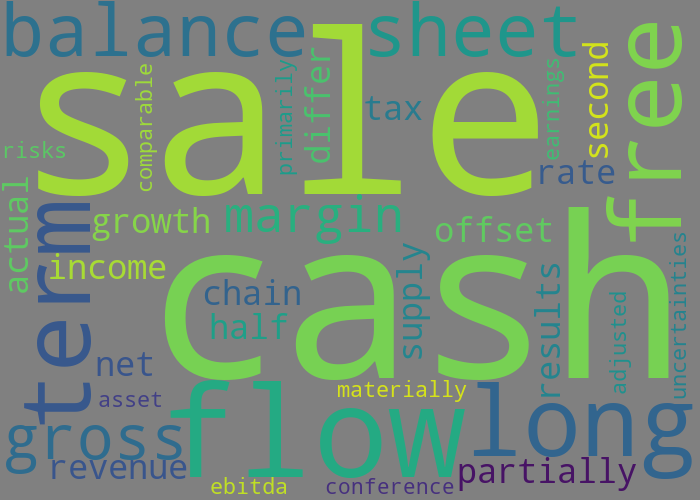

In [0]:
#Combined PR
freq_words = X_train_df1.sum().sort_values(ascending=False).head(20) 
# this is a series of words and their count
list(freq_words.index)
freq_words = ' '.join(list(freq_words.index))


wc = wordcloud.WordCloud(background_color='grey', max_words=75, width=700, height =500, stopwords=stops)
# adding stop words will put only the stop words, not eliminate them.
cloud = wc.generate(freq_words)
cloud.to_image()


#####Notes
# Word cloud 1 - X_train_df1 - Combined PR
# Word cloud 2 - X_train_df1a - Combined QA
# Word cloud 3 - X_train_df2 - Neg PR
# Word cloud 4 - X_train_df3 - Neg QA
# Word cloud 5 - X_train_df4 - Pos PR
# Word cloud 6 - X_train_df5 - Pos QA

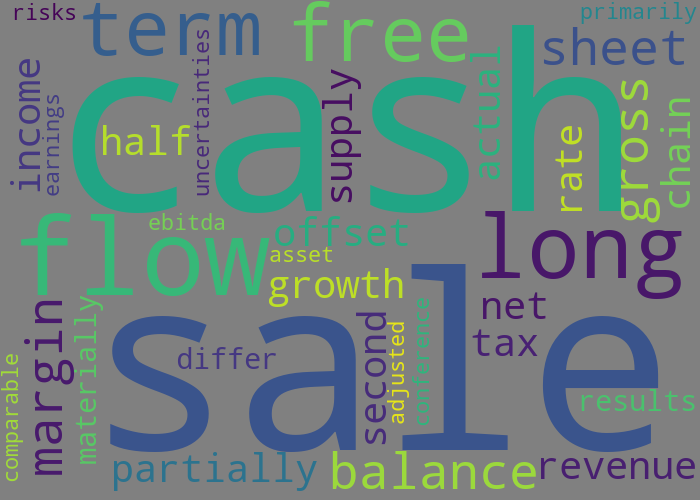

In [0]:
#Combined Q&A
freq_words = X_train_df1a.sum().sort_values(ascending=False).head(20) 
# this is a series of words and their count
list(freq_words.index)
freq_words = ' '.join(list(freq_words.index))


wc = wordcloud.WordCloud(background_color='grey', max_words=75, width=700, height =500, stopwords=stops)
# adding stop words will put only the stop words, not eliminate them.
cloud = wc.generate(freq_words)
cloud.to_image()


#####Notes
# Word cloud 1 - X_train_df1 - Combined PR
# Word cloud 2 - X_train_df1a - Combined QA
# Word cloud 3 - X_train_df2 - Neg PR
# Word cloud 4 - X_train_df3 - Neg QA
# Word cloud 5 - X_train_df4 - Pos PR
# Word cloud 6 - X_train_df5 - Pos QA

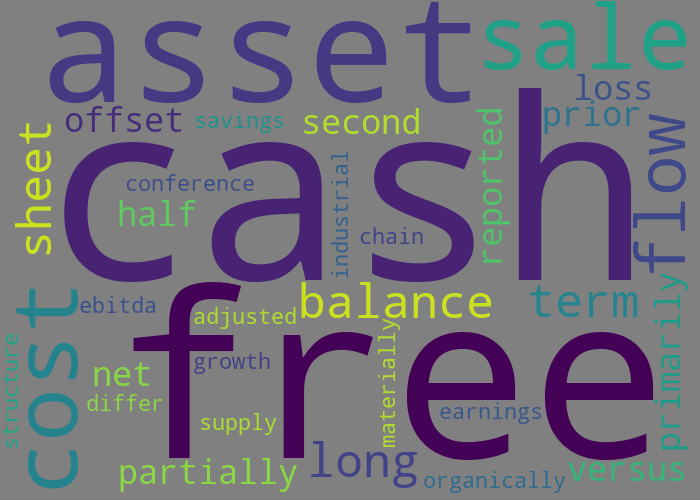

In [0]:
#Negative PR
freq_words = X_train_df2.sum().sort_values(ascending=False).head(20) 
# this is a series of words and their count
list(freq_words.index)
freq_words = ' '.join(list(freq_words.index))


wc = wordcloud.WordCloud(background_color='grey', max_words=75, width=700, height =500, stopwords=stops)
# adding stop words will put only the stop words, not eliminate them.
cloud = wc.generate(freq_words)
cloud.to_image()


#####Notes
# Word cloud 1 - X_train_df1 - Combined PR
# Word cloud 2 - X_train_df1a - Combined QA
# Word cloud 3 - X_train_df2 - Neg PR
# Word cloud 4 - X_train_df3 - Neg QA
# Word cloud 5 - X_train_df4 - Pos PR
# Word cloud 6 - X_train_df5 - Pos QA

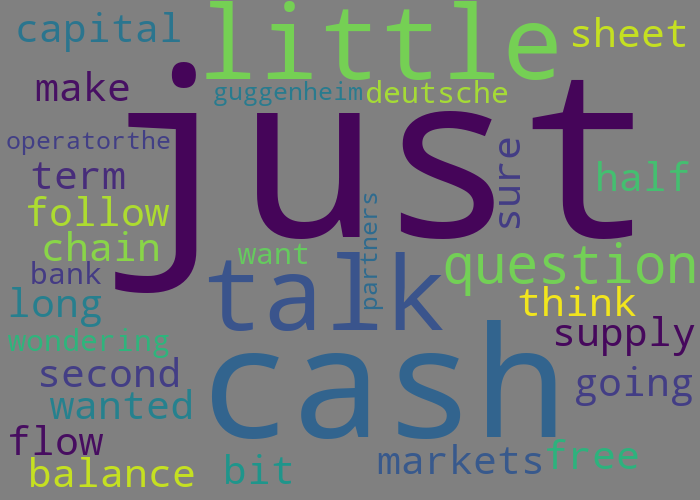

In [0]:
#Negative QA
freq_words = X_train_df3.sum().sort_values(ascending=False).head(20) 
# this is a series of words and their count
list(freq_words.index)
freq_words = ' '.join(list(freq_words.index))


wc = wordcloud.WordCloud(background_color='grey', max_words=75, width=700, height =500, stopwords=stops)
# adding stop words will put only the stop words, not eliminate them.
cloud = wc.generate(freq_words)
cloud.to_image()


#####Notes
# Word cloud 1 - X_train_df1 - Combined PR
# Word cloud 2 - X_train_df1a - Combined QA
# Word cloud 3 - X_train_df2 - Neg PR
# Word cloud 4 - X_train_df3 - Neg QA
# Word cloud 5 - X_train_df4 - Pos PR
# Word cloud 6 - X_train_df5 - Pos QA

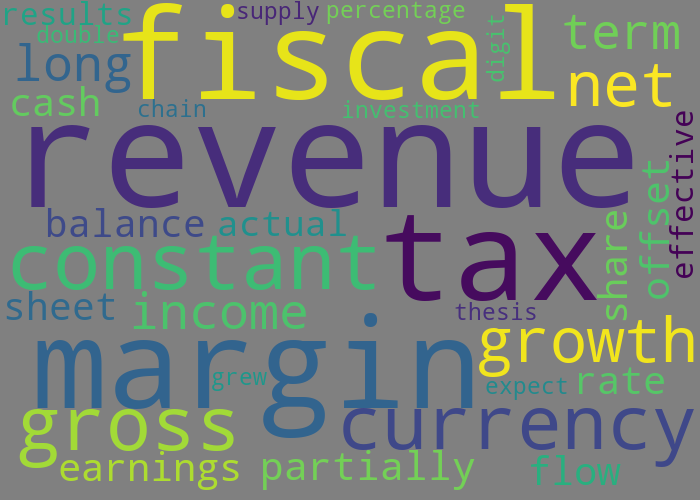

In [0]:
#Positive PR
freq_words = X_train_df4.sum().sort_values(ascending=False).head(20) 
# this is a series of words and their count
list(freq_words.index)
freq_words = ' '.join(list(freq_words.index))


wc = wordcloud.WordCloud(background_color='grey', max_words=75, width=700, height =500, stopwords=stops)
# adding stop words will put only the stop words, not eliminate them.
cloud = wc.generate(freq_words)
cloud.to_image()


#####Notes
# Word cloud 1 - X_train_df1 - Combined PR
# Word cloud 2 - X_train_df1a - Combined QA
# Word cloud 3 - X_train_df2 - Neg PR
# Word cloud 4 - X_train_df3 - Neg QA
# Word cloud 5 - X_train_df4 - Pos PR
# Word cloud 6 - X_train_df5 - Pos QA

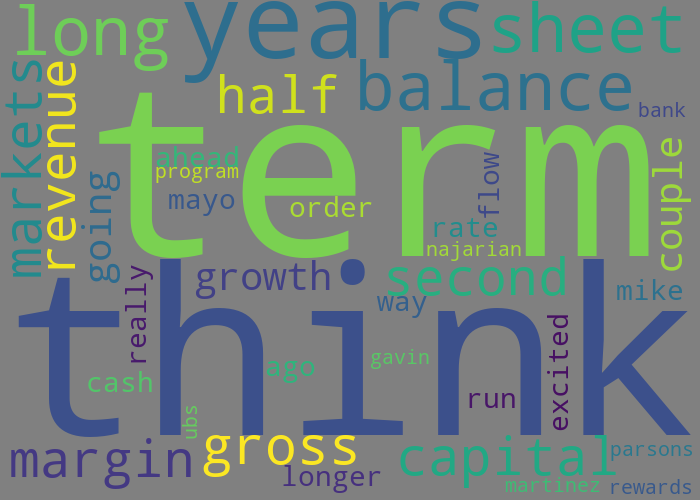

In [0]:
##Positive QA
freq_words = X_train_df5.sum().sort_values(ascending=False).head(20) 
# this is a series of words and their count
list(freq_words.index)
freq_words = ' '.join(list(freq_words.index))


wc = wordcloud.WordCloud(background_color='grey', max_words=75, width=700, height =500, stopwords=stops)
# adding stop words will put only the stop words, not eliminate them.
cloud = wc.generate(freq_words)
cloud.to_image()


#####Notes
# Word cloud 1 - X_train_df1 - Combined PR
# Word cloud 2 - X_train_df1a - Combined QA
# Word cloud 3 - X_train_df2 - Neg PR
# Word cloud 4 - X_train_df3 - Neg QA
# Word cloud 5 - X_train_df4 - Pos PR
# Word cloud 6 - X_train_df5 - Pos QA

In [0]:
#build word clouds for sentiment dataframes

In [0]:
df_combo.columns

Index(['Co_name', 'Period', 'Ticker', 'Target', 'Prep_Remarks', 'QA',
       '% StopWord_count_Remarks', '% StopWord_count_QA', 'FR_Index_PR',
       'GF_PR', 'RIX_PR', 'DC_Index_PR', 'Words_per_sent_PR',
       'Complex_words_PR', 'Long_words_PR', 'Wordtypes_PR', 'FR_Index_QA',
       'GF_QA', 'RIX_QA', 'DC_Index_QA', 'Words_per_sent_QA',
       'Complex_words_QA', 'Long_words_QA', 'Wordtypes_QA'],
      dtype='object')